# 1. Import Libraries & Data

In [23]:
# Import libraries 

# Data analysis
import pandas as pd
import numpy as np
import os

# Visualization
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [24]:
# Set path for dataset
path = '/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/02 Data/Prepared Data/Dataset-scaled.csv'

In [25]:
# Load csv file
df = pd.read_csv(path)

In [26]:
# Check import
df.head()

id      DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0   0  19600101   -1.6              0.661            -0.028           0.826   
1   1  19600102   -1.6              0.245            -0.028           0.736   
2   2  19600103   -1.6              1.076            -0.028           1.278   
3   3  19600104   -1.6             -1.002            -0.028           1.458   
4   4  19600105   -1.6              0.245            -0.028           1.729   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0          -0.002                  -1.101               -0.265   
1          -0.002                  -1.058                1.659   
2          -0.002                  -1.251                0.156   
3          -0.002                  -0.822               -0.446   
4          -0.002                  -0.747               -0.165   

   BASEL_snow_depth  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0            -0.179          -0.903           -0.529          -0.846   
1            -0.179          -0.810           -0.583          -0.462   
2            -0.179          -1.065           -0.257          -0.187   
3            -0.179          -0.114           -0.556          -0.386   
4            -0.179           0.187           -1.004          -1.076   

   BASEL_temp_max  BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0          -0.478                -1.206              0.905              0.322   
1          -0.570                 0.653              1.119              0.017   
2          -0.593                 0.653              0.620              0.110   
3          -0.513                 1.397              1.761              1.290   
4          -1.040                 1.397              2.188              1.528   

   BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                     -0.743                  -0.371              0.284   
1                     -1.418                  -0.371             -1.333   
2                     -0.968                  -0.371             -0.525   
3                     -1.418                  -0.371             -1.333   
4                     -1.418                  -0.254             -1.333   

   BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
0              -1.017             -1.220             -0.949   
1              -1.108             -0.819             -1.298   
2              -1.085             -1.168             -1.099   
3              -1.210             -1.363             -1.438   
4              -1.210             -1.013             -1.458   

   BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                -0.255              -0.01             -0.006   
1                -0.255              -0.01             -0.006   
2                -0.255              -0.01             -0.006   
3                -0.255              -0.01             -0.006   
4                -0.255              -0.01             -0.006   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                     -1.119                  -0.322             -0.773   
1                     -1.416                   0.372             -1.344   
2                     -1.279                  -0.345             -1.195   
3                     -1.404                  -0.345             -1.344   
4                     -1.404                  -0.345             -1.344   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
0              -1.099             -1.119             -1.137   
1              -1.111             -0.879             -1.341   
2              -1.064             -0.839             -1.116   
3              -1.146             -1.012             -1.208   
4              -1.087             -0.919             -1.116   

   DEBILT_cloud_cover  DEBILT_wind_speed  DEBILT_humidity  DEBILT_pressure  \
0               0.714              2.781            0.358           -1.232   
1   

In [27]:
# Check time span in dataset
df['DATE'].min(), df['DATE'].max()

(19600101, 20221031)

In [28]:
# Set display configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3) 

# 2. Data Reduction - Temperature

In [29]:
#Reduce to just the mean temperatures
df = df[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [30]:
df.head()

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
0  19600101   -1.6           -0.529              -1.017              -1.099   
1  19600102   -1.6           -0.583              -1.108              -1.111   
2  19600103   -1.6           -0.257              -1.085              -1.064   
3  19600104   -1.6           -0.556              -1.210              -1.146   
4  19600105   -1.6           -1.004              -1.210              -1.087   

   DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
0            -0.114                -0.106            -0.928   
1            -0.368                -0.371            -0.825   
2            -0.510                -0.533            -0.940   
3            -0.526                -0.577            -1.043   
4            -0.320                -0.445            -0.979   

   HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
0              -0.106            -0.183               -1.371   
1              -0.893            -0.212               -1.044   
2              -0.491            -0.390               -0.741   
3              -0.316            -0.493               -0.911   
4              -0.403            -0.552               -0.862   

   MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  OSLO_temp_mean  \
0                -0.097            -0.988              -0.266          -0.187   
1                -0.232            -0.692              -0.354          -0.369   
2                -0.487            -0.853              -0.404          -0.551   
3                -0.472            -0.624              -0.643          -0.417   
4                -0.307            -0.382              -0.907          -0.332   

   ROMA_temp_mean  SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
0          -1.280               -0.124               -0.391           -0.257   
1          -0.540               -0.651               -0.416           -0.336   
2          -0.876               -0.651               -0.615           -0.210   
3          -0.775               -0.943               -0.764           -0.069   
4          -0.927               -0.622               -0.503           -0.038   

   VALENTIA_temp_mean  
0              -0.668  
1              -0.548  
2              -0.067  
3              -0.999  
4              -1.509

In [31]:
#Drop the non-essential DATE and MONTH data 
notemp = df.drop(['DATE','MONTH'], axis=1)

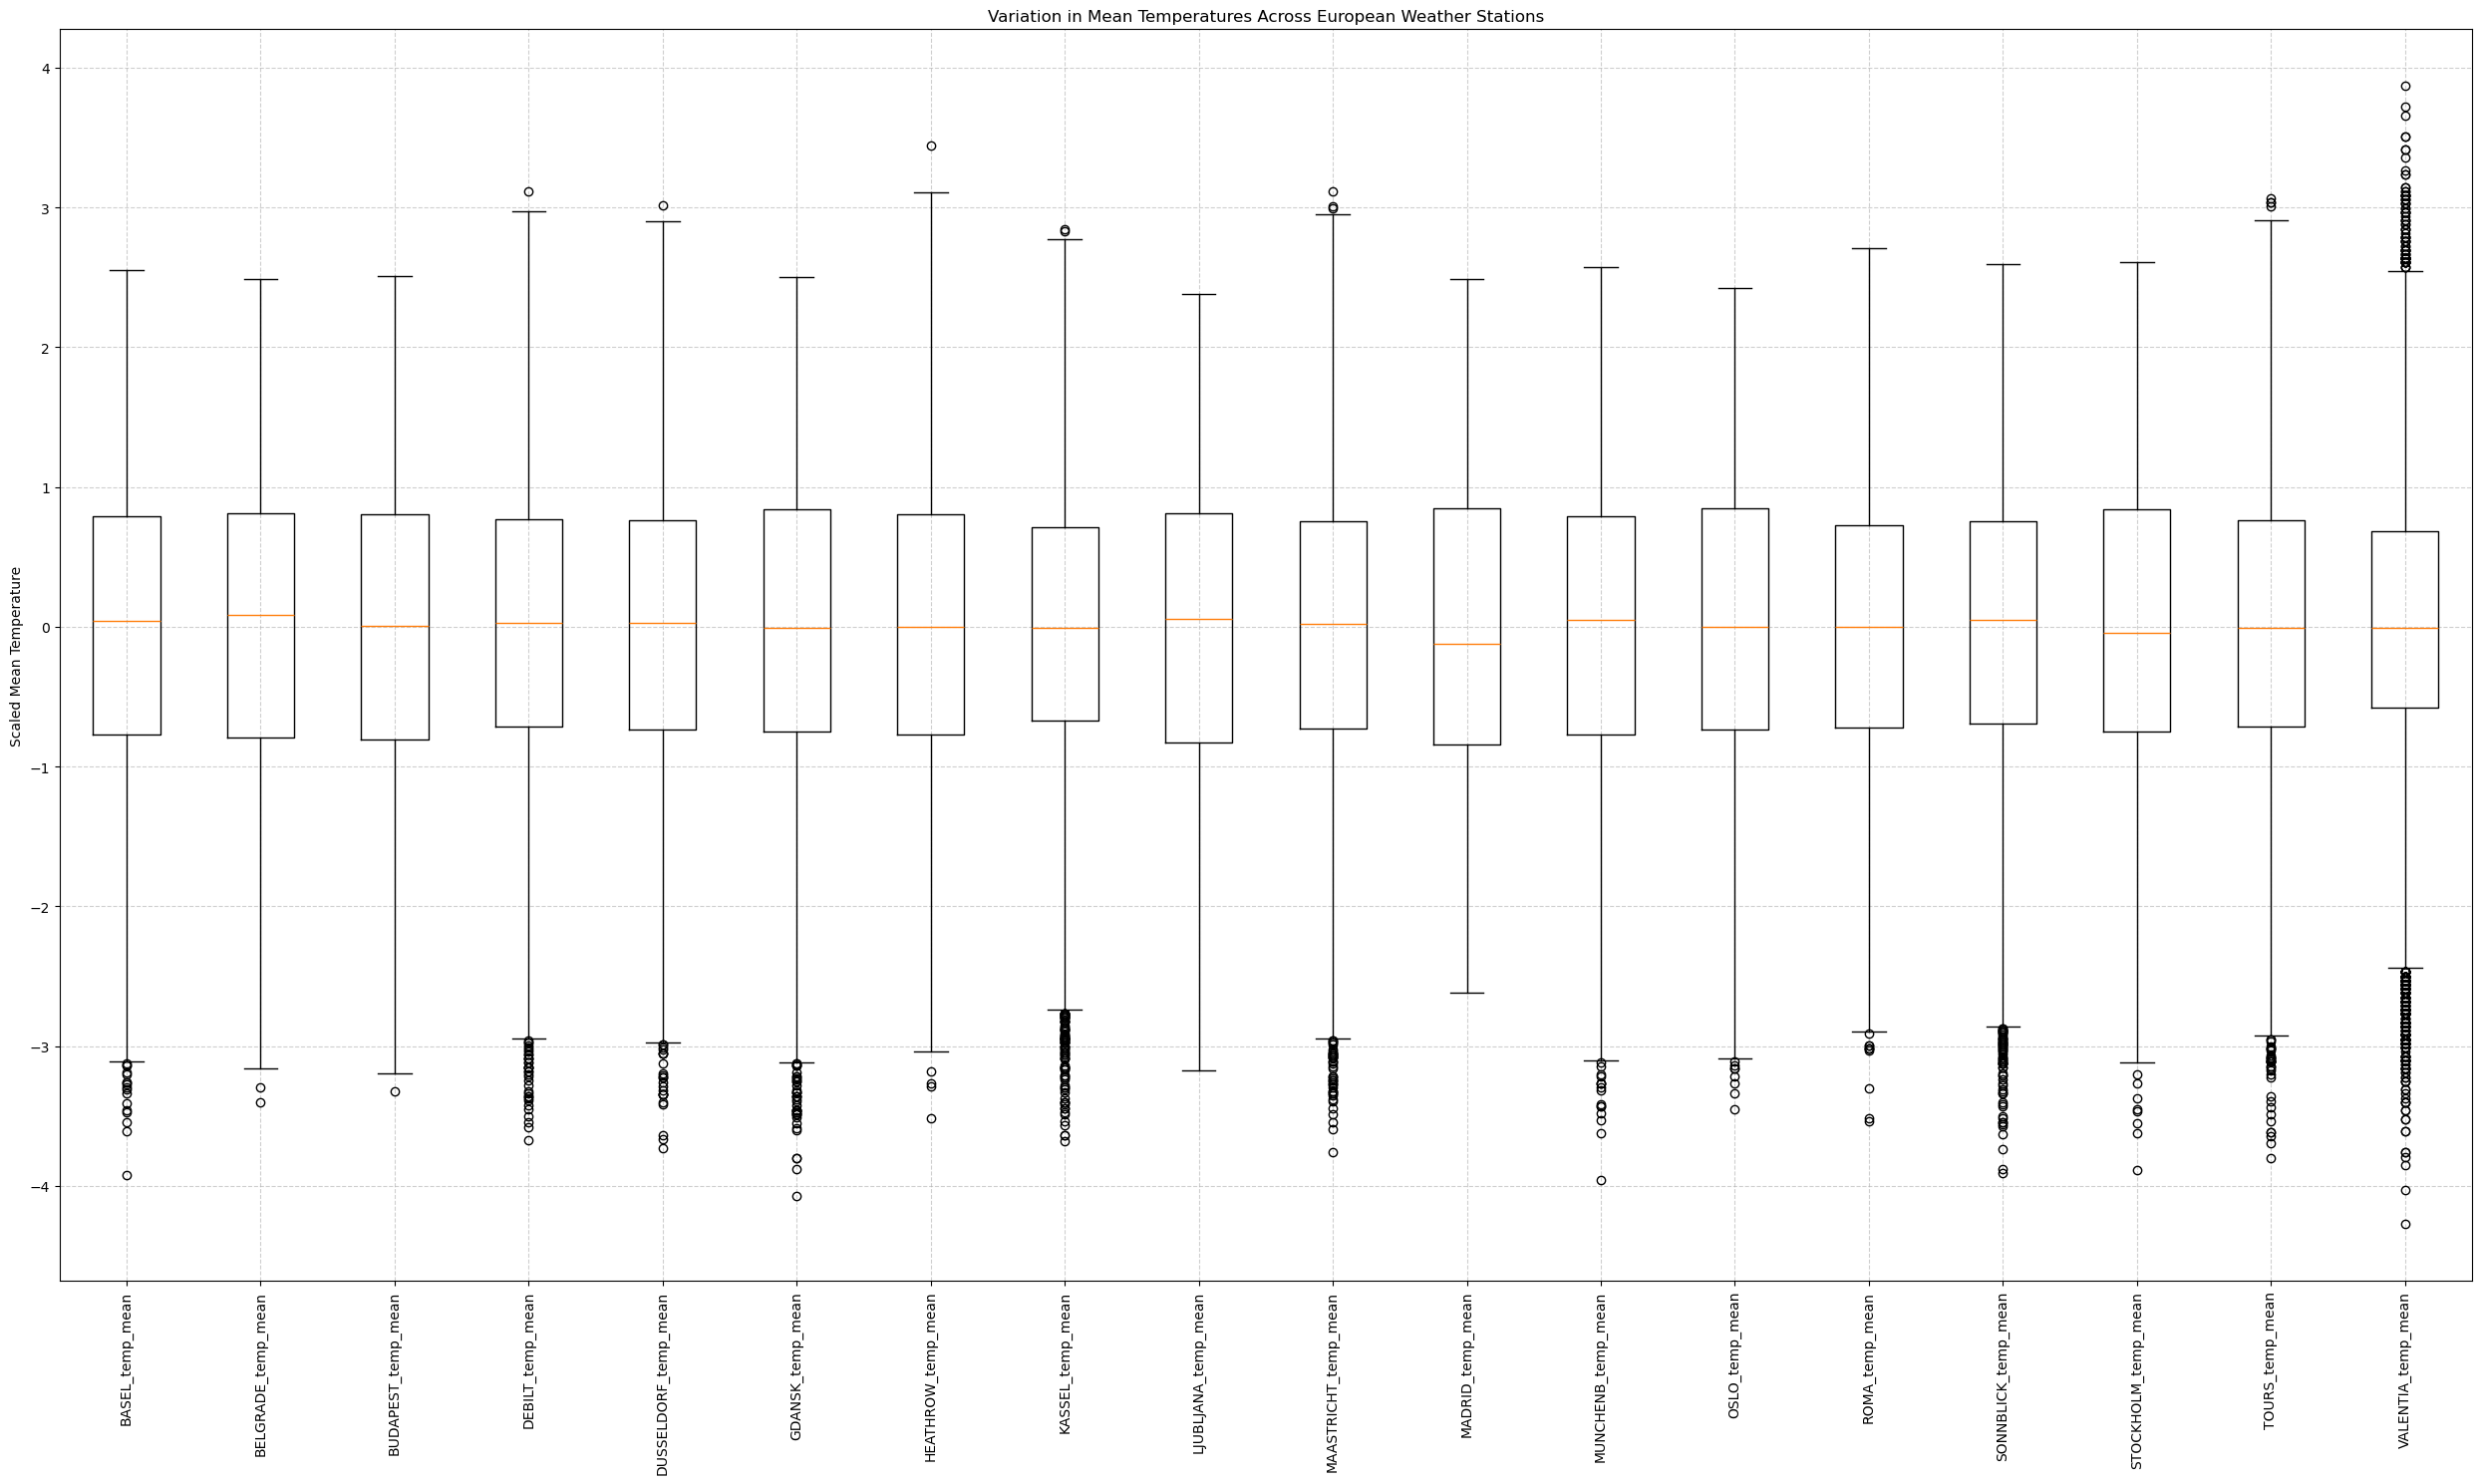

In [32]:
# Create whisker plot to see variation in temperature
plt.figure(figsize=(25, 15))
plt.boxplot(df.iloc[:, 2:].values);
plt.xticks(range(1, len(df.columns[2:]) + 1), df.columns[2:], rotation=90)
plt.title("Variation in Mean Temperatures Across European Weather Stations")
plt.ylabel("Scaled Mean Temperature")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/mean_temp_whiskerplot.png"
plt.savefig(save_path, dpi=300)
plt.show()

### Observation:
- The whisker plot shows that temperature distributions vary significantly by station, which is to be expected due to the geographical range of the data.
- Most have a relatively similar central tendency (around the mean of the scaled range). Because the data are scaled, the relative differences (rather than absolute values) show which locations have greater variability or seasonal extremes.
- Outliers are visible at the upper and lower ends for several stations, which point to days with unusually high or low temperatures within their respective years.
- Stations such as Sonnblick (an alpine site) and Madrid show wider spreads and more pronounced temperature variability, whereas coastal or northern stations like Valentia and Oslo appear more stable.

# 3. Basel Analysis

## 3.1 Basel, 1962

In [35]:
# Reduce the data to only temperature in Basel, 1962
df2 = df[['DATE', 'MONTH', 'BASEL_temp_mean']].copy()

In [36]:
df2

DATE  MONTH  BASEL_temp_mean
0      19600101 -1.600           -0.529
1      19600102 -1.600           -0.583
2      19600103 -1.600           -0.257
3      19600104 -1.600           -0.556
4      19600105 -1.600           -1.004
...         ...    ...              ...
22945  20221027  1.014            0.748
22946  20221028  1.014            0.857
22947  20221029  1.014            0.857
22948  20221030  1.014            0.680
22949  20221031  1.014            0.422

[22950 rows x 3 columns]

In [37]:
#Reduce dataset to only 1962
dfyear = df2[df2['DATE'].astype(str).str.contains('1962')] 
dfyear

DATE  MONTH  BASEL_temp_mean
731   19620101 -1.600           -1.316
732   19620102 -1.600           -1.656
733   19620103 -1.600           -2.131
734   19620104 -1.600           -1.764
735   19620105 -1.600           -1.561
...        ...    ...              ...
1091  19621227  1.594           -3.204
1092  19621228  1.594           -2.443
1093  19621229  1.594           -2.172
1094  19621230  1.594           -1.506
1095  19621231  1.594           -1.561

[365 rows x 3 columns]

In [38]:
# Remove date and month 
notemp = df2.drop(['DATE', 'MONTH'], axis = 1)

In [39]:
dfyear.describe()

DATE    MONTH  BASEL_temp_mean
count  3.650e+02  365.000          365.000
mean   1.962e+07    0.005           -0.228
std    3.455e+02    1.003            1.099
min    1.962e+07   -1.600           -3.204
25%    1.962e+07   -0.729           -1.140
50%    1.962e+07    0.142           -0.271
75%    1.962e+07    1.014            0.694
max    1.962e+07    1.594            2.079

In [40]:
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [42]:
notempyear

BASEL_temp_mean
731            -1.316
732            -1.656
733            -2.131
734            -1.764
735            -1.561
...               ...
1091           -3.204
1092           -2.443
1093           -2.172
1094           -1.506
1095           -1.561

[365 rows x 1 columns]

<Figure size 640x480 with 0 Axes>

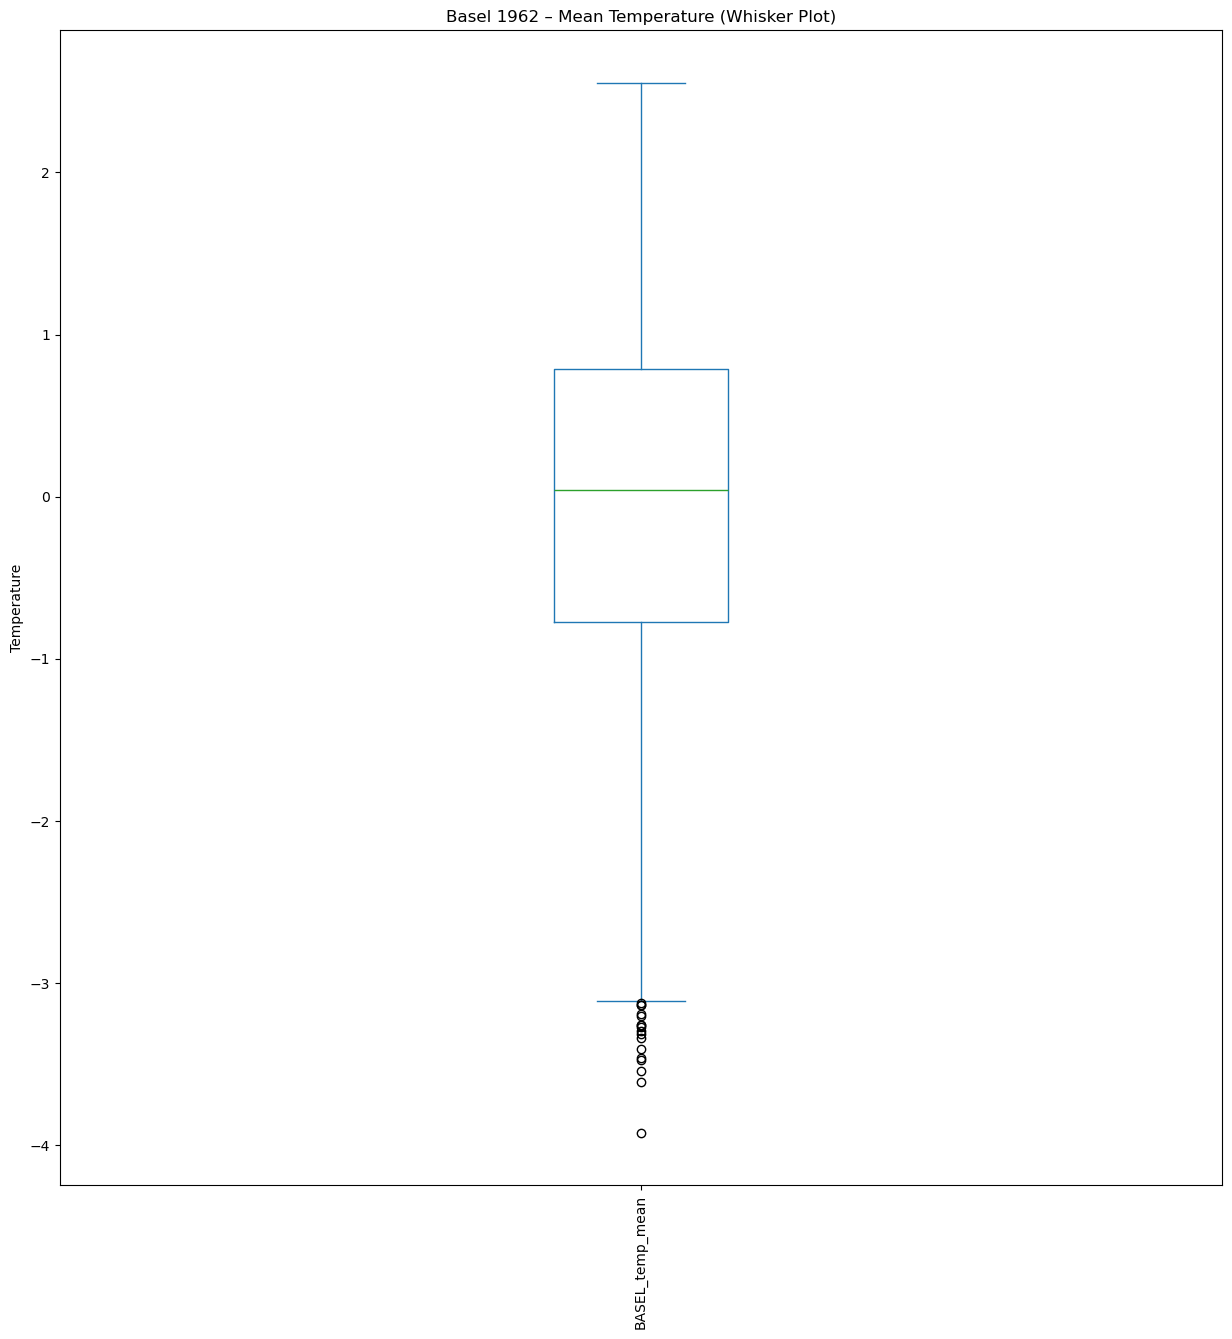

In [68]:
# Create the whisker/box plot
plt.figure(figsize=(15, 15))
df2["BASEL_temp_mean"].plot(kind="box");

plt.xticks(rotation=90)
plt.title("Basel 1962 – Mean Temperature (Whisker Plot)")
plt.ylabel("Temperature")

# Export the plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/basel1962_mean_temp_whiskerplot.png"
plt.savefig(save_path, dpi=300)

# Show the plot
plt.show()

In [47]:
# Create an index for the year
i = np.arange(0.01,3.66,0.01)
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

### It is clear from this output that there are 365 rows.

In [49]:
# Translate the chosen weather data into the X and y datasets needed for optimization

# Define n_rows first based on the length of the index
n_rows = len(index)  

X = index.to_numpy().reshape(n_rows, 1)
ones = np.ones((n_rows, 1))
X = np.concatenate((ones, X), axis=1)
y = dfyear['BASEL_temp_mean'].to_numpy().reshape(n_rows, 1)

In [50]:
# Check output
X.shape, y.shape

((365, 2), (365, 1))

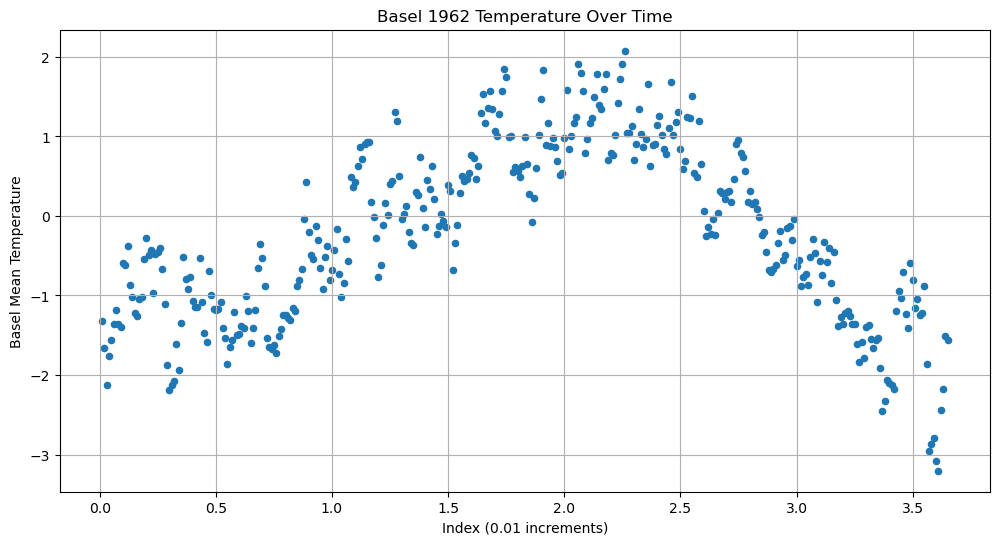

In [69]:
# Scatter plot of the 1962 Basel temperature

plt.figure(figsize=(12, 6))
plt.scatter(
    x=index['index'], 
    y=dfyear['BASEL_temp_mean'], 
    s=20)

plt.xlabel('Index (0.01 increments)')
plt.ylabel('Basel Mean Temperature')
plt.title('Basel 1962 Temperature Over Time')

plt.grid(True)

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/basel1962_mean_temp_scatterplot.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

In [53]:
# Check for min temperature within the Basel 1962 Mean Temp
dfyear['BASEL_temp_mean'].min()

-3.2040120998121213

In [54]:
# Check for max temperature within the Basel 1962 Mean Temp
dfyear['BASEL_temp_mean'].max()

2.078862799472186

In [55]:
# Compute Loss Function for the gradient descent.
def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [56]:
compute_cost(X,y)

array([0.62807681])

In [57]:
# Gradient Descent Function
def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [64]:
# Set the starting condition for theta init
%time
num_iterations=100 
theta_init=np.array([[10],[-10]])
alpha=0.1
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 3 μs, sys: 2 μs, total: 5 μs
Wall time: 26 μs


In [65]:
# Check theta
theta

array([[ 1.09945024],
       [-0.55643332]])

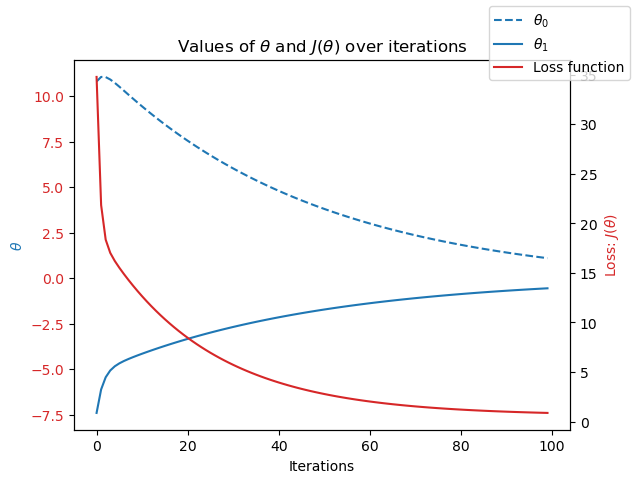

In [70]:
# Plot loss, theta0 and theta1. 
fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend()

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/basel1962_loss_function.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot with the legend
plt.show()

### Observation: The loss function decreases rapidly at first and then gradually levels off towards zero. This shows that gradient descent is successfully converging toward an optimal solution.

In [71]:
%%time

# 1. Choose theta ranges based on history (add a margin around loss plot)
theta0_min = min(theta0_history) - 2   # little buffer below
theta0_max = max(theta0_history) + 2   # little buffer above

theta1_min = min(theta1_history) - 2
theta1_max = max(theta1_history) + 2

theta0_vals = np.linspace(theta0_min, theta0_max, 100)
theta1_vals = np.linspace(theta1_min, theta1_max, 100)

# 2. Allocate J(theta0, theta1) grid
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# 3. Compute cost for each (theta0, theta1) pair
for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        theta_ij = np.array([[t0], [t1]])      # column vector shape (2,1)
        J_vals[i, j] = float(compute_cost(X, y, theta_ij))


<timed exec>:18: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



CPU times: user 1.25 s, sys: 31.5 ms, total: 1.28 s
Wall time: 1.42 s


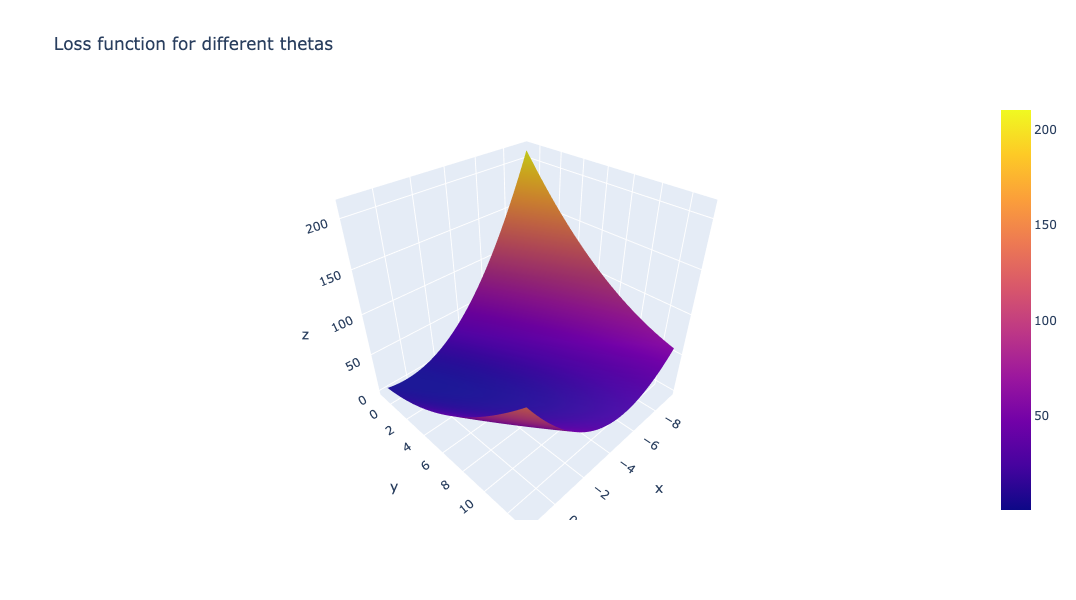

In [77]:
# Plot 3D loss function for different thetas
#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### Observation: This plot shows that among all the possible lines we could draw through the 1962 Basel temperature data. The plot shows that, on average, temperatures in Basel in 1962 slowly decreased over the course of the year.

## 3.2 Basel, 1992

In [98]:
#Reduce dataset to only 1992
dfyear = df2_basel_1992[df2_basel_1992['DATE'].astype(str).str.contains('1992')] 
dfyear

DATE  MONTH  BASEL_temp_mean
11688  19920101 -1.600           -1.615
11689  19920102 -1.600           -1.506
11690  19920103 -1.600           -1.601
11691  19920104 -1.600           -1.113
11692  19920105 -1.600           -0.787
...         ...    ...              ...
12049  19921227  1.594           -1.697
12050  19921228  1.594           -1.751
12051  19921229  1.594           -1.941
12052  19921230  1.594           -1.995
12053  19921231  1.594           -2.050

[366 rows x 3 columns]

In [99]:
# Remove date and month 
notemp = df2.drop(['DATE', 'MONTH'], axis = 1)

In [100]:
dfyear.describe()

DATE    MONTH  BASEL_temp_mean
count  3.660e+02  366.000          366.000
mean   1.992e+07    0.001            0.042
std    3.458e+02    1.004            1.012
min    1.992e+07   -1.600           -2.185
25%    1.992e+07   -0.729           -0.732
50%    1.992e+07    0.142           -0.060
75%    1.992e+07    0.941            0.897
max    1.992e+07    1.594            2.242

In [101]:
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [85]:
notempyear

BASEL_temp_mean
11688           -1.615
11689           -1.506
11690           -1.601
11691           -1.113
11692           -0.787
...                ...
12049           -1.697
12050           -1.751
12051           -1.941
12052           -1.995
12053           -2.050

[366 rows x 1 columns]

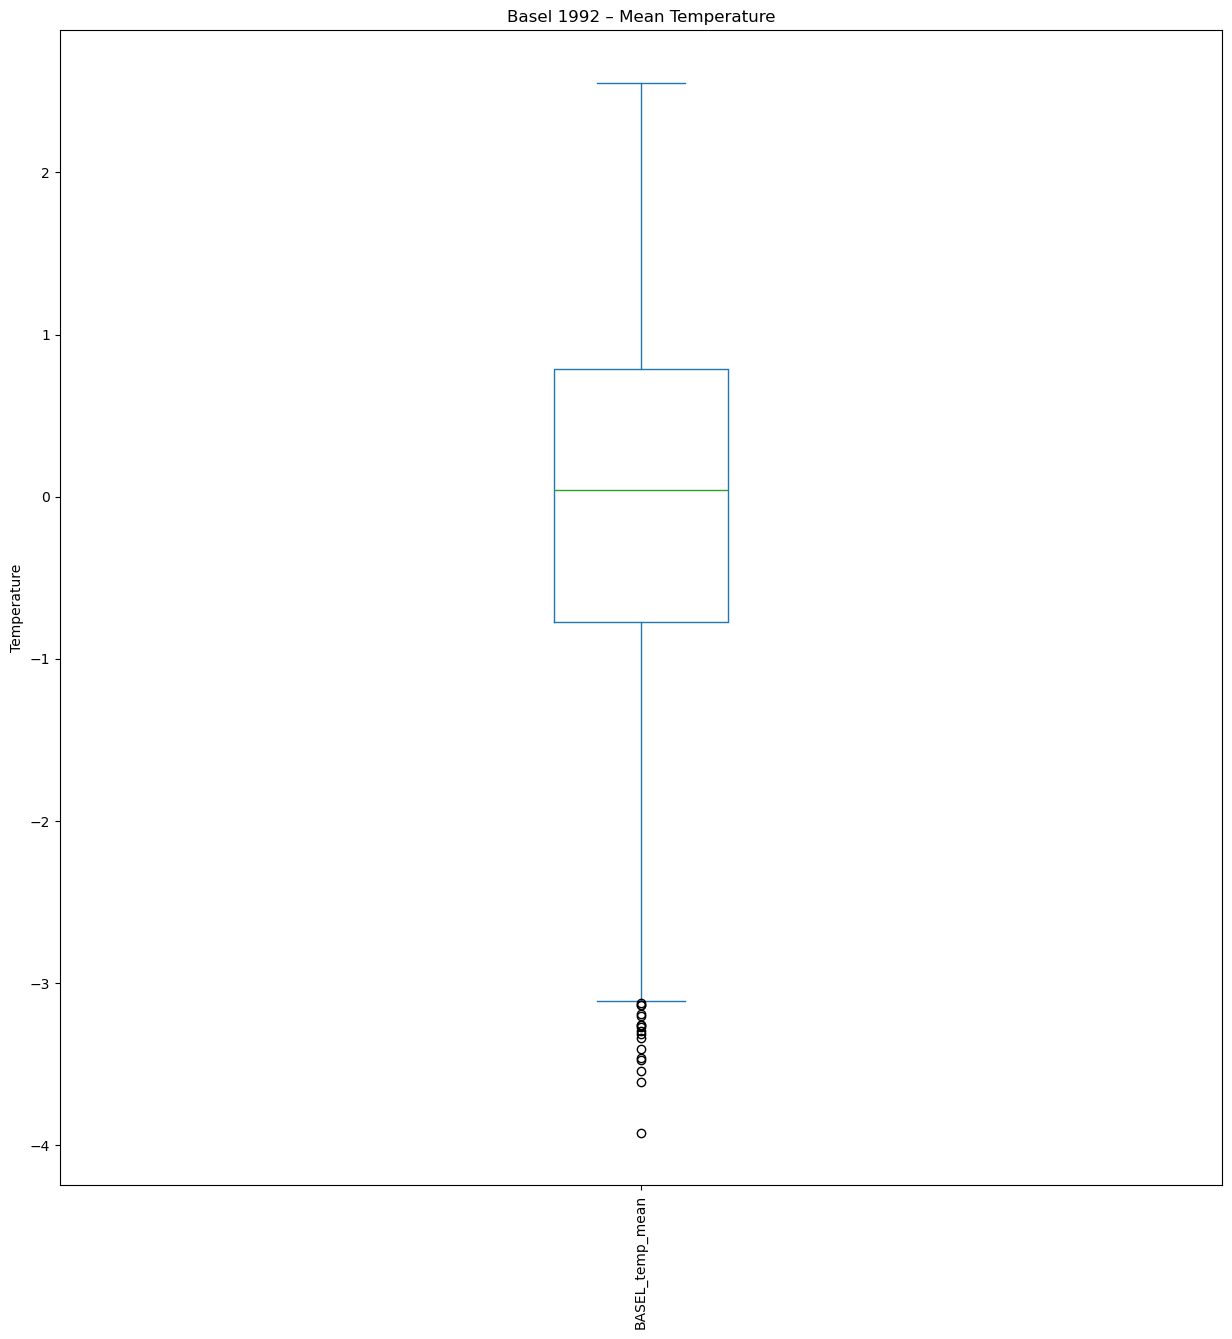

In [102]:
# Create the whisker/box plot
plt.figure(figsize=(15, 15))
df2["BASEL_temp_mean"].plot(kind="box");

plt.xticks(rotation=90)
plt.title("Basel 1992 – Mean Temperature")
plt.ylabel("Temperature")

# Export the plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/basel1992_mean_temp_whiskerplot.png"
plt.savefig(save_path, dpi=300)

plt.show()

In [103]:
# Create an index for the year
n_rows = len(dfyear)

i = np.arange(0.01, 0.01*(n_rows+1), 0.01)
index = pd.DataFrame({'index': i})

In [104]:
X = index.to_numpy().reshape(n_rows, 1)
ones = np.ones((n_rows, 1))
X = np.concatenate((ones, X), axis=1)

y = dfyear['BASEL_temp_mean'].to_numpy().reshape(n_rows, 1)

In [105]:
# Check output
X.shape, y.shape

((366, 2), (366, 1))

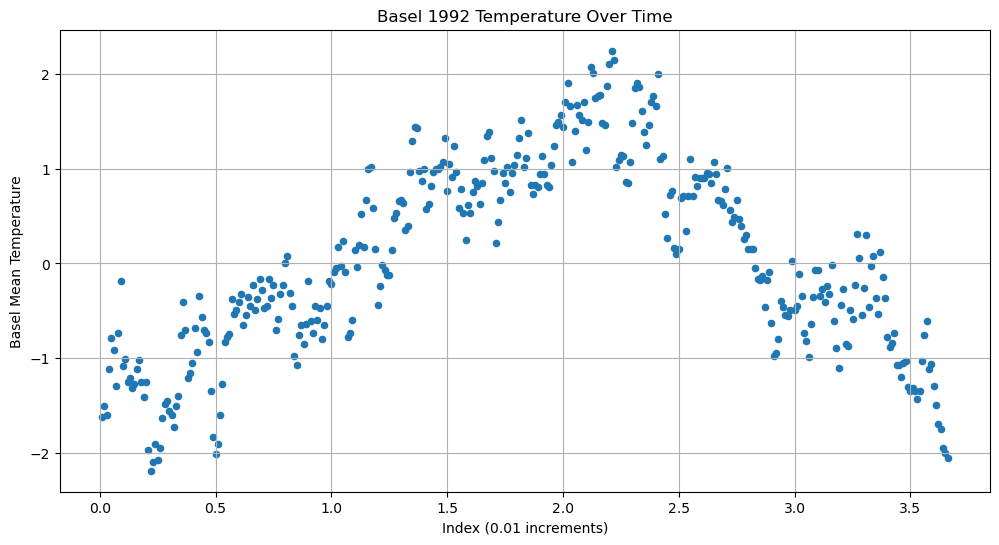

In [108]:
# Scatter plot of the 1992 Basel temperature

plt.figure(figsize=(12, 6))
plt.scatter(
    x=index['index'], 
    y=dfyear['BASEL_temp_mean'], 
    s=20)

plt.xlabel('Index (0.01 increments)')
plt.ylabel('Basel Mean Temperature')
plt.title('Basel 1992 Temperature Over Time')

plt.grid(True)

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/basel1992_mean_temp_scatterplot.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

In [109]:
# Check for min temperature within the Basel 1992 Mean Temp
dfyear['BASEL_temp_mean'].min()

-2.1854629547058924

In [110]:
# Check for max temperature within the Basel 1992 Mean Temp
dfyear['BASEL_temp_mean'].max()

2.2418306626891833

In [111]:
# Compute Loss Function for the gradient descent.
def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [112]:
compute_cost(X,y)

array([0.51124989])

In [113]:
# Gradient Descent Function
def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [114]:
# Set the starting condition for theta init
%time
num_iterations=100 
theta_init=np.array([[10],[-10]])
alpha=0.1
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 162 μs


In [115]:
# Check theta
theta

array([[ 1.15742202],
       [-0.43957522]])

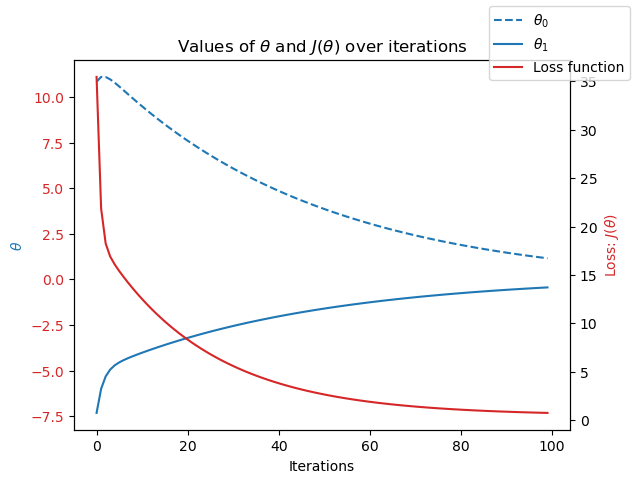

In [116]:
# Plot loss, theta0 and theta1. 
fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend()

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/basel1992_loss_function.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot with the legend
plt.show()

In [117]:
%%time

# 1. Choose theta ranges based on history (add a margin around loss plot)
theta0_min = min(theta0_history) - 2   # little buffer below
theta0_max = max(theta0_history) + 2   # little buffer above

theta1_min = min(theta1_history) - 2
theta1_max = max(theta1_history) + 2

theta0_vals = np.linspace(theta0_min, theta0_max, 100)
theta1_vals = np.linspace(theta1_min, theta1_max, 100)

# 2. Allocate J(theta0, theta1) grid
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# 3. Compute cost for each (theta0, theta1) pair
for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        theta_ij = np.array([[t0], [t1]])      # column vector shape (2,1)
        J_vals[i, j] = float(compute_cost(X, y, theta_ij))

<timed exec>:18: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



CPU times: user 1.34 s, sys: 44.2 ms, total: 1.38 s
Wall time: 1.84 s


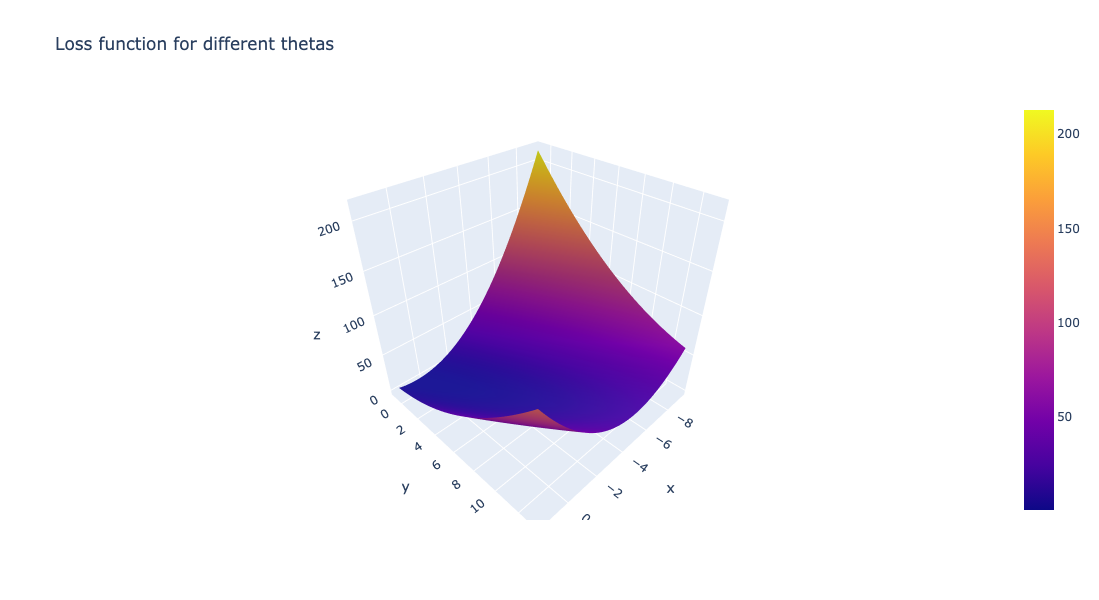

In [118]:
# Plot 3D loss function for different thetas
#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

## 3.3 Basel, 2019

In [147]:
#Reduce dataset to only 2019
dfyear = df2[df2['DATE'].astype(str).str.contains('2019')] 
dfyear

DATE  MONTH  BASEL_temp_mean
21550  20190101 -1.600           -0.732
21551  20190102 -1.600           -0.963
21552  20190103 -1.600           -1.452
21553  20190104 -1.600           -1.425
21554  20190105 -1.600           -1.126
...         ...    ...              ...
21910  20191227  1.594           -0.488
21911  20191228  1.594           -0.909
21912  20191229  1.594           -1.520
21913  20191230  1.594           -1.343
21914  20191231  1.594           -1.357

[365 rows x 3 columns]

### Observation: The original choice of the year <b>2022</b> has an inconsistent number of rows; therefore, the year of 2019 was selected for having consistent numbers as the years before.

In [148]:
# Remove date and month 
notemp = df2.drop(['DATE', 'MONTH'], axis = 1)

In [149]:
dfyear.describe()

DATE    MONTH  BASEL_temp_mean
count  3.650e+02  365.000          365.000
mean   2.019e+07    0.005            0.171
std    3.455e+02    1.003            0.977
min    2.019e+07   -1.600           -1.669
25%    2.019e+07   -0.729           -0.556
50%    2.019e+07    0.142            0.096
75%    2.019e+07    1.014            0.897
max    2.019e+07    1.594            2.541

In [150]:
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [151]:
notempyear

BASEL_temp_mean
21550           -0.732
21551           -0.963
21552           -1.452
21553           -1.425
21554           -1.126
...                ...
21910           -0.488
21911           -0.909
21912           -1.520
21913           -1.343
21914           -1.357

[365 rows x 1 columns]

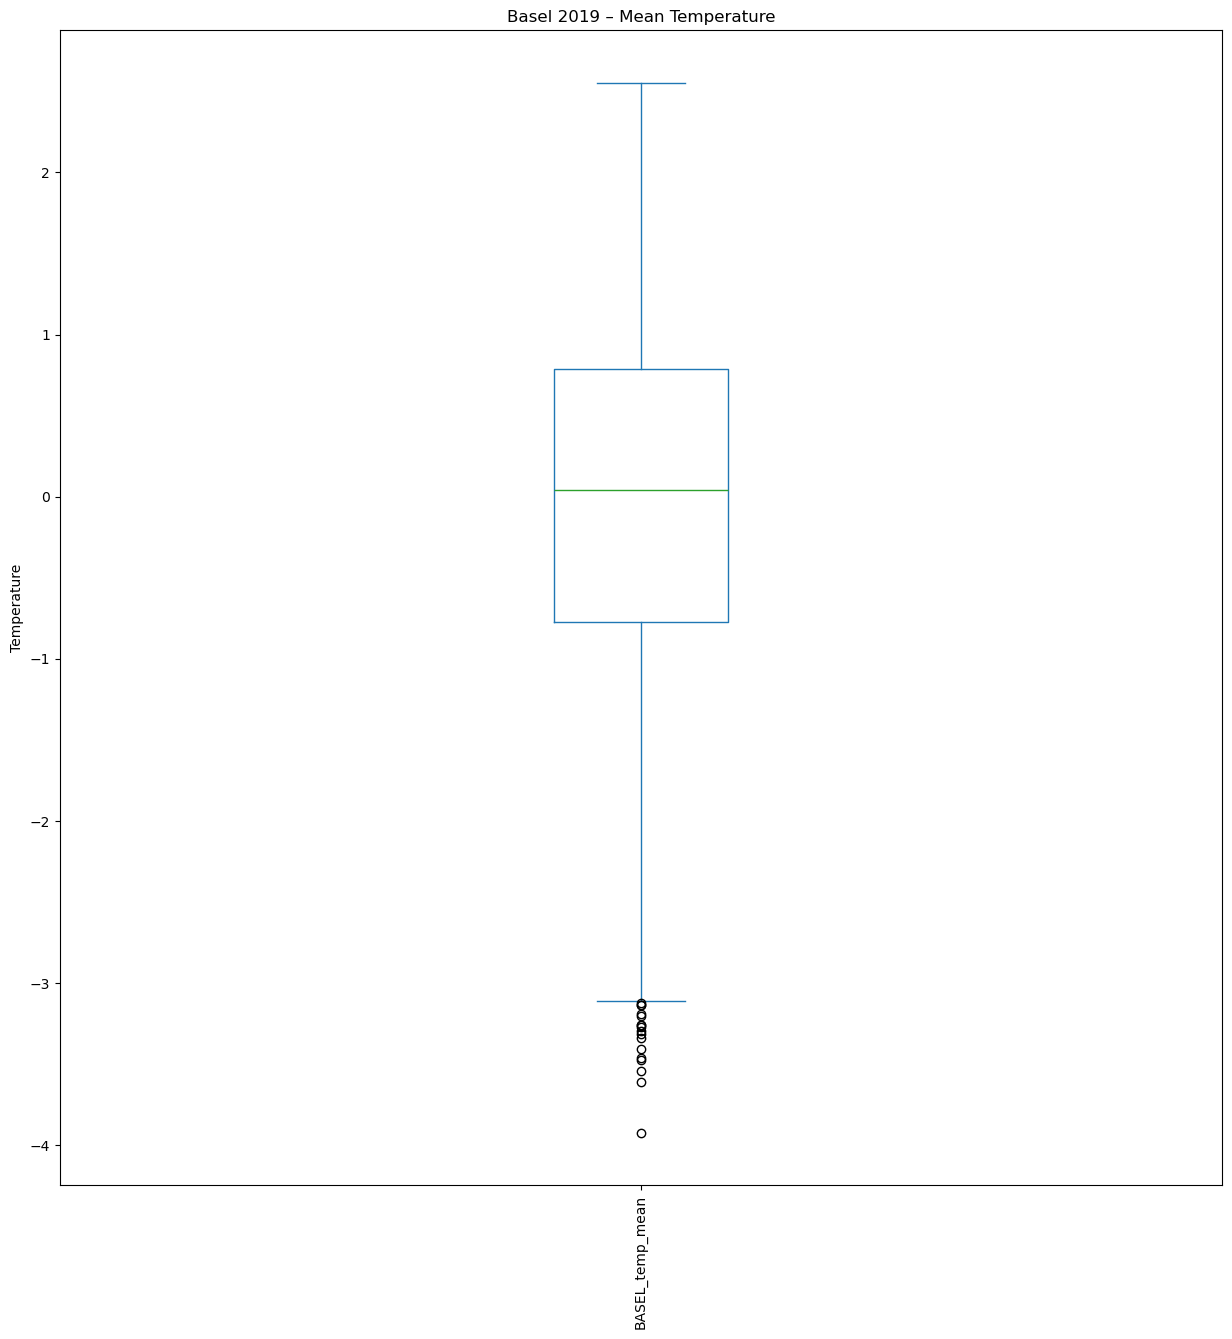

In [152]:
# Create the whisker/box plot
plt.figure(figsize=(15, 15))
df2["BASEL_temp_mean"].plot(kind="box");

plt.xticks(rotation=90)
plt.title("Basel 2019 – Mean Temperature")
plt.ylabel("Temperature")

# Export the plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/basel2019_mean_temp_whiskerplot.png"
plt.savefig(save_path, dpi=300)

plt.show()

In [153]:
# Create an index for the year
n_rows = len(dfyear)

i = np.arange(0.01, 0.01*(n_rows+1), 0.01)
index = pd.DataFrame({'index': i})

In [154]:
X = index.to_numpy().reshape(n_rows, 1)
ones = np.ones((n_rows, 1))
X = np.concatenate((ones, X), axis=1)

y = dfyear['BASEL_temp_mean'].to_numpy().reshape(n_rows, 1)

In [155]:
# Check output
X.shape, y.shape

((365, 2), (365, 1))

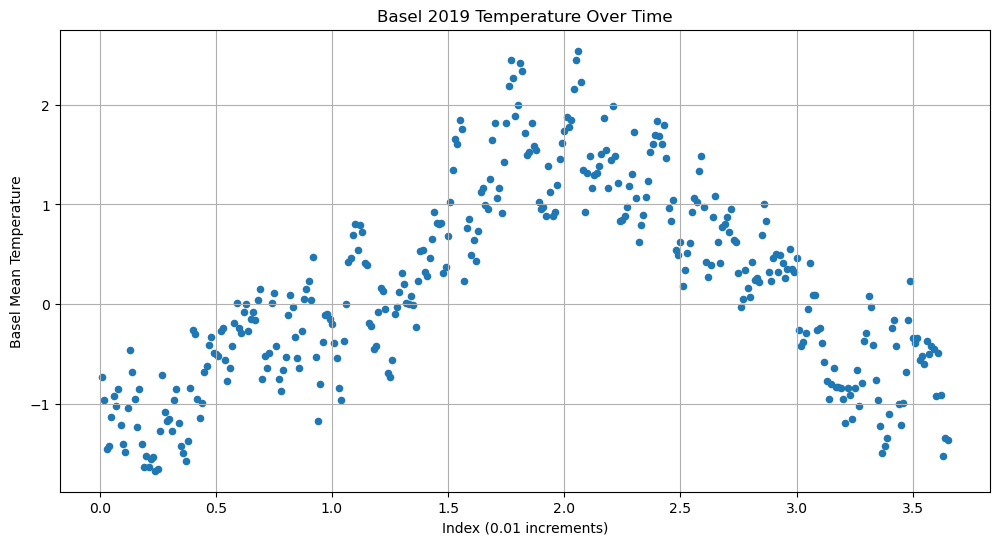

In [156]:
# Scatter plot of the 2019 Basel temperature

plt.figure(figsize=(12, 6))
plt.scatter(
    x=index['index'], 
    y=dfyear['BASEL_temp_mean'], 
    s=20)

plt.xlabel('Index (0.01 increments)')
plt.ylabel('Basel Mean Temperature')
plt.title('Basel 2019 Temperature Over Time')

plt.grid(True)

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/basel2019_mean_temp_scatterplot.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

In [157]:
# Check for min temperature within the Basel 2019 Mean Temp
dfyear['BASEL_temp_mean'].min()

-1.669398054518736

In [158]:
# Check for max temperature within the Basel 2019 Mean Temp
dfyear['BASEL_temp_mean'].max()

2.540605078587011

In [159]:
# Compute Loss Function for the gradient descent.
def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [160]:
compute_cost(X,y)

array([0.49029456])

In [161]:
# Gradient Descent Function
def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [162]:
# Set the starting condition for theta init
%time
num_iterations=100 
theta_init=np.array([[10],[-10]])
alpha=0.1
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 4 μs, sys: 1 μs, total: 5 μs
Wall time: 310 μs


In [163]:
# Check theta
theta

array([[ 1.24926108],
       [-0.42173868]])

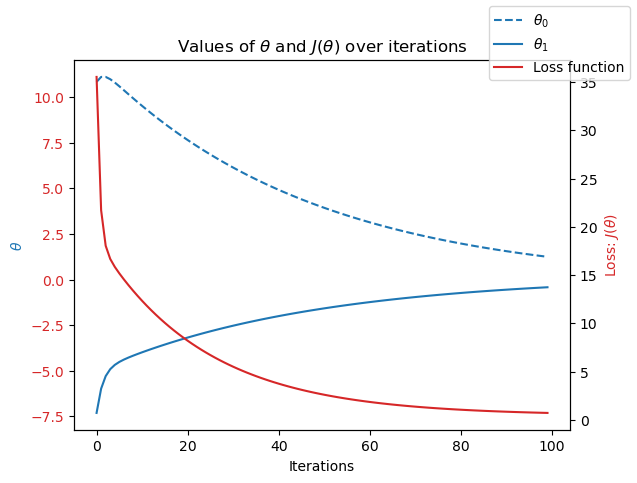

In [164]:
# Plot loss, theta0 and theta1. 
fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend()

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/basel2019_loss_function.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot with the legend
plt.show()

In [165]:
%%time

# 1. Choose theta ranges based on history (add a margin around loss plot)
theta0_min = min(theta0_history) - 2   # little buffer below
theta0_max = max(theta0_history) + 2   # little buffer above

theta1_min = min(theta1_history) - 2
theta1_max = max(theta1_history) + 2

theta0_vals = np.linspace(theta0_min, theta0_max, 100)
theta1_vals = np.linspace(theta1_min, theta1_max, 100)

# 2. Allocate J(theta0, theta1) grid
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# 3. Compute cost for each (theta0, theta1) pair
for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        theta_ij = np.array([[t0], [t1]])      # column vector shape (2,1)
        J_vals[i, j] = float(compute_cost(X, y, theta_ij))

<timed exec>:18: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



CPU times: user 1.32 s, sys: 40.3 ms, total: 1.36 s
Wall time: 1.55 s


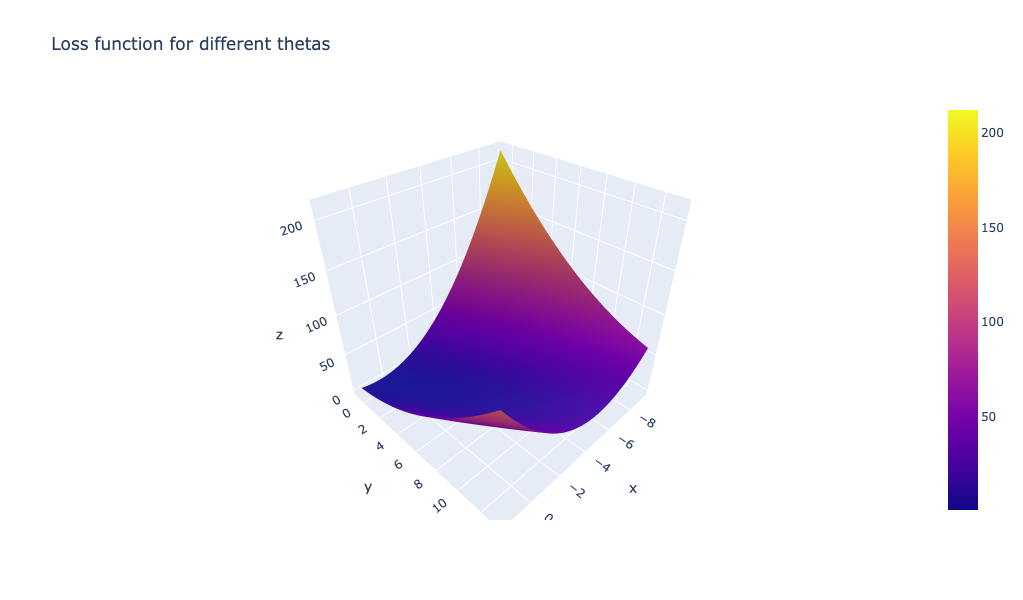

In [166]:
# Plot 3D loss function for different thetas
#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

# 4. Madrid

In [167]:
# Create new df for Madrid
# Reduce the data to only temperature in Madrid
df_madrid = df[['DATE', 'MONTH', 'MADRID_temp_mean']].copy()
df_madrid

DATE  MONTH  MADRID_temp_mean
0      19600101 -1.600            -0.988
1      19600102 -1.600            -0.692
2      19600103 -1.600            -0.853
3      19600104 -1.600            -0.624
4      19600105 -1.600            -0.382
...         ...    ...               ...
22945  20221027  1.014             0.683
22946  20221028  1.014             0.562
22947  20221029  1.014             0.548
22948  20221030  1.014             0.104
22949  20221031  1.014            -0.112

[22950 rows x 3 columns]

## 4.1 Madrid, 1962

In [193]:
# Reduce dataset to only 1962
dfyear = df_madrid[df_madrid['DATE'].astype(str).str.contains('1962')]
dfyear

DATE  MONTH  MADRID_temp_mean
731   19620101 -1.600            -0.395
732   19620102 -1.600            -0.463
733   19620103 -1.600            -0.746
734   19620104 -1.600            -0.921
735   19620105 -1.600            -1.244
...        ...    ...               ...
1091  19621227  1.594            -2.053
1092  19621228  1.594            -1.554
1093  19621229  1.594            -1.002
1094  19621230  1.594            -0.975
1095  19621231  1.594            -1.069

[365 rows x 3 columns]

In [172]:
# Remove date and month 
notemp = df_madrid.drop(['DATE', 'MONTH'], axis = 1)

In [173]:
dfyear.describe()

DATE    MONTH  MADRID_temp_mean
count  3.660e+02  366.000           366.000
mean   1.960e+07    0.001            -0.130
std    3.458e+02    1.004             0.980
min    1.960e+07   -1.600            -2.323
25%    1.960e+07   -0.729            -0.891
50%    1.960e+07    0.142            -0.294
75%    1.960e+07    0.941             0.788
max    1.960e+07    1.594             1.937

In [174]:
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [175]:
notempyear

MADRID_temp_mean
0              -0.988
1              -0.692
2              -0.853
3              -0.624
4              -0.382
..                ...
361            -1.069
362            -1.339
363            -0.921
364            -0.773
365            -1.137

[366 rows x 1 columns]

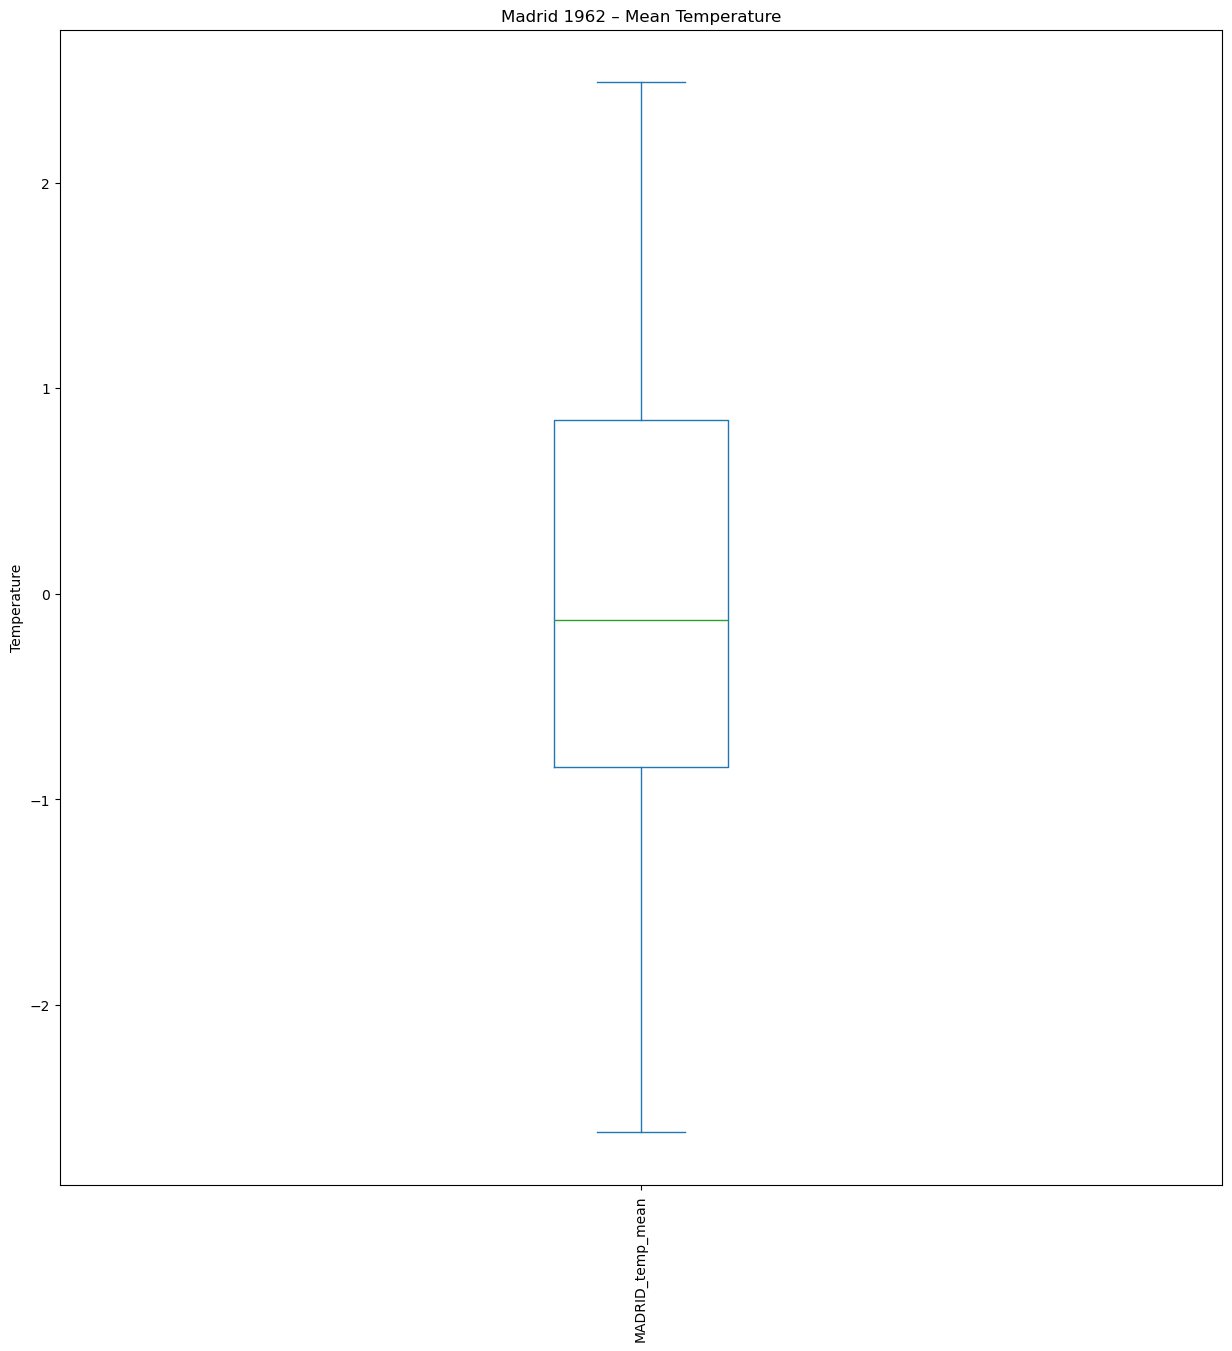

In [176]:
# Create the whisker/box plot
plt.figure(figsize=(15, 15))
df_madrid["MADRID_temp_mean"].plot(kind="box");

plt.xticks(rotation=90)
plt.title("Madrid 1962 – Mean Temperature")
plt.ylabel("Temperature")

# Export the plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/madrid1962_mean_temp_whiskerplot.png"
plt.savefig(save_path, dpi=300)

plt.show()

In [177]:
# Create an index for the year
n_rows = len(dfyear)

i = np.arange(0.01, 0.01*(n_rows+1), 0.01)
index = pd.DataFrame({'index': i})

In [179]:
X = index.to_numpy().reshape(n_rows, 1)
ones = np.ones((n_rows, 1))
X = np.concatenate((ones, X), axis=1)

y = dfyear['MADRID_temp_mean'].to_numpy().reshape(n_rows, 1)

In [180]:
# Check output
X.shape, y.shape

((366, 2), (366, 1))

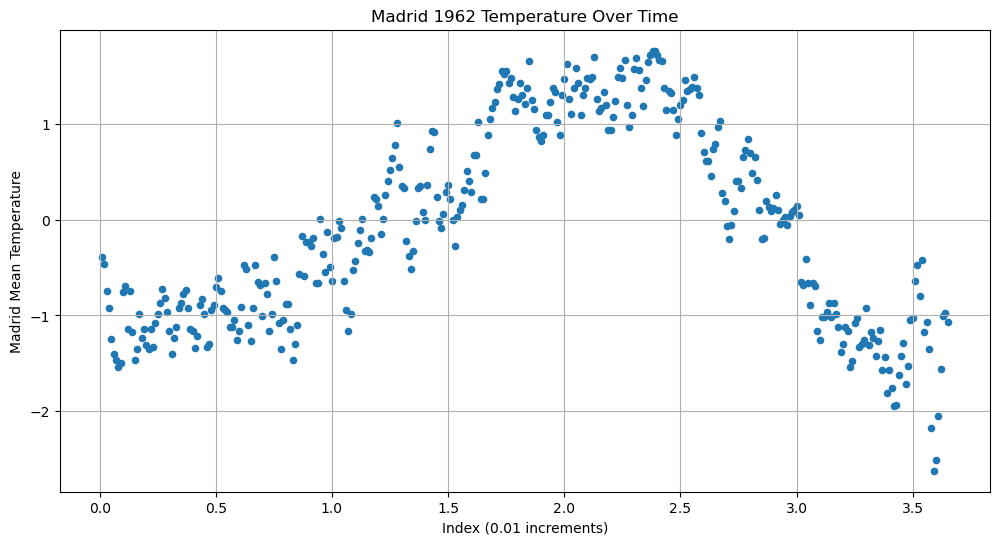

In [203]:
# Scatter plot of the 1962 Madrid temperature

plt.figure(figsize=(12, 6))
plt.scatter(
    x=index['index'], 
    y=dfyear['MADRID_temp_mean'], 
    s=20)

plt.xlabel('Index (0.01 increments)')
plt.ylabel('Madrid Mean Temperature')
plt.title('Madrid 1962 Temperature Over Time')

plt.grid(True)

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/madrid1962_mean_temp_scatterplot.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

In [182]:
# Check for min temperature within the Madrid 1962 Mean Temp
dfyear['MADRID_temp_mean'].min()

-2.322710316206882

In [183]:
# Check for max temperature within the Madrid 1962 Mean Temp
dfyear['MADRID_temp_mean'].max()

1.9366821017377809

In [184]:
# Compute Loss Function for the gradient descent.
def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [185]:
compute_cost(X,y)

array([0.48699971])

In [186]:
# Gradient Descent Function
def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [187]:
# Set the starting condition for theta init
%time
num_iterations=100 
theta_init=np.array([[10],[-10]])
alpha=0.1
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 4 μs, sys: 1e+03 ns, total: 5 μs
Wall time: 15.3 μs


In [188]:
# Check theta
theta

array([[ 1.14860474],
       [-0.52926485]])

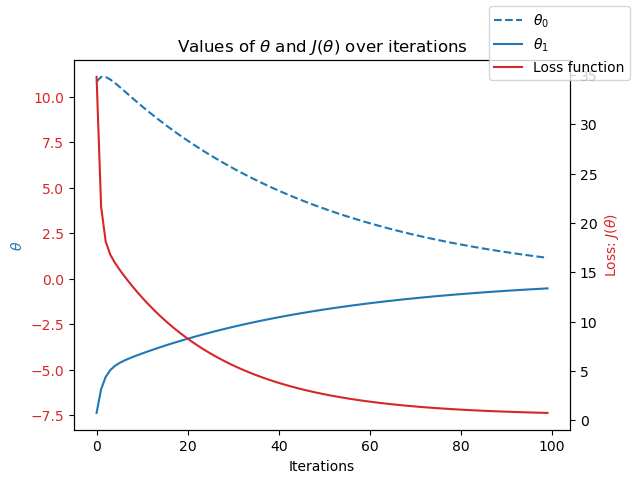

In [189]:
# Plot loss, theta0 and theta1. 
fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend()

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/madrid1962_loss_function.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot with the legend
plt.show()

In [190]:
%%time

# 1. Choose theta ranges based on history (add a margin around loss plot)
theta0_min = min(theta0_history) - 2   # little buffer below
theta0_max = max(theta0_history) + 2   # little buffer above

theta1_min = min(theta1_history) - 2
theta1_max = max(theta1_history) + 2

theta0_vals = np.linspace(theta0_min, theta0_max, 100)
theta1_vals = np.linspace(theta1_min, theta1_max, 100)

# 2. Allocate J(theta0, theta1) grid
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# 3. Compute cost for each (theta0, theta1) pair
for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        theta_ij = np.array([[t0], [t1]])      # column vector shape (2,1)
        J_vals[i, j] = float(compute_cost(X, y, theta_ij))

<timed exec>:18: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



CPU times: user 1.4 s, sys: 44.3 ms, total: 1.45 s
Wall time: 1.7 s


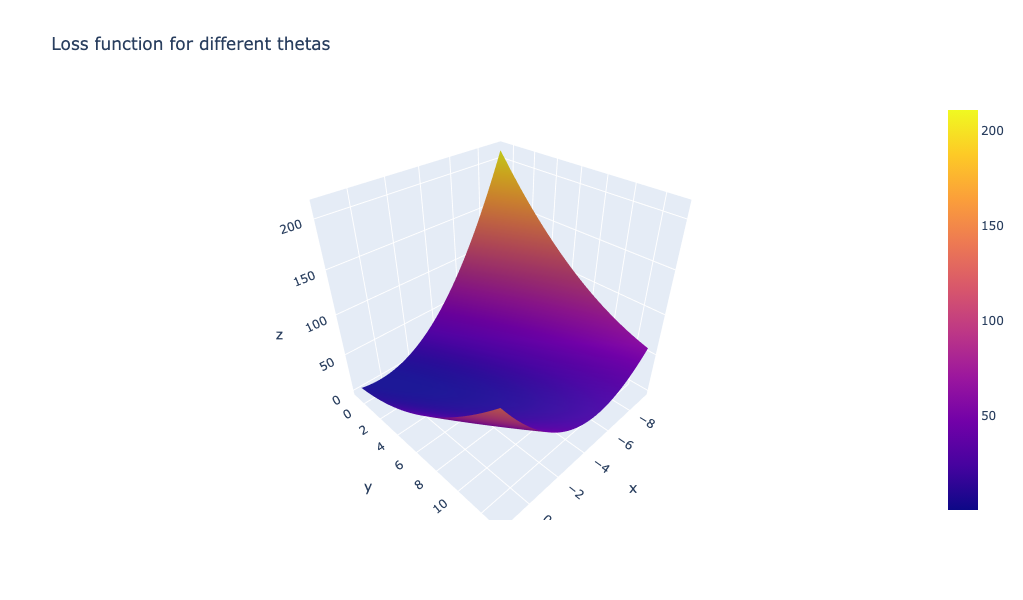

In [191]:
# Plot 3D loss function for different thetas
#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

## 4.2 Madrid, 1992

In [192]:
# Reduce dataset to only 1992
dfyear = df_madrid[df_madrid['DATE'].astype(str).str.contains('1992')]
dfyear

DATE  MONTH  MADRID_temp_mean
11688  19920101 -1.600            -1.581
11689  19920102 -1.600            -1.069
11690  19920103 -1.600            -1.056
11691  19920104 -1.600            -1.366
11692  19920105 -1.600            -1.500
...         ...    ...               ...
12049  19921227  1.594            -0.907
12050  19921228  1.594            -1.312
12051  19921229  1.594            -1.568
12052  19921230  1.594            -1.581
12053  19921231  1.594            -1.824

[366 rows x 3 columns]

In [194]:
# Remove date and month 
notemp = df_madrid.drop(['DATE', 'MONTH'], axis = 1)

In [195]:
dfyear.describe()

DATE    MONTH  MADRID_temp_mean
count  3.650e+02  365.000           365.000
mean   1.962e+07    0.005            -0.079
std    3.455e+02    1.003             1.037
min    1.962e+07   -1.600            -2.619
25%    1.962e+07   -0.729            -0.988
50%    1.962e+07    0.142            -0.166
75%    1.962e+07    1.014             0.912
max    1.962e+07    1.594             1.761

In [196]:
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [197]:
notempyear

MADRID_temp_mean
731             -0.395
732             -0.463
733             -0.746
734             -0.921
735             -1.244
...                ...
1091            -2.053
1092            -1.554
1093            -1.002
1094            -0.975
1095            -1.069

[365 rows x 1 columns]

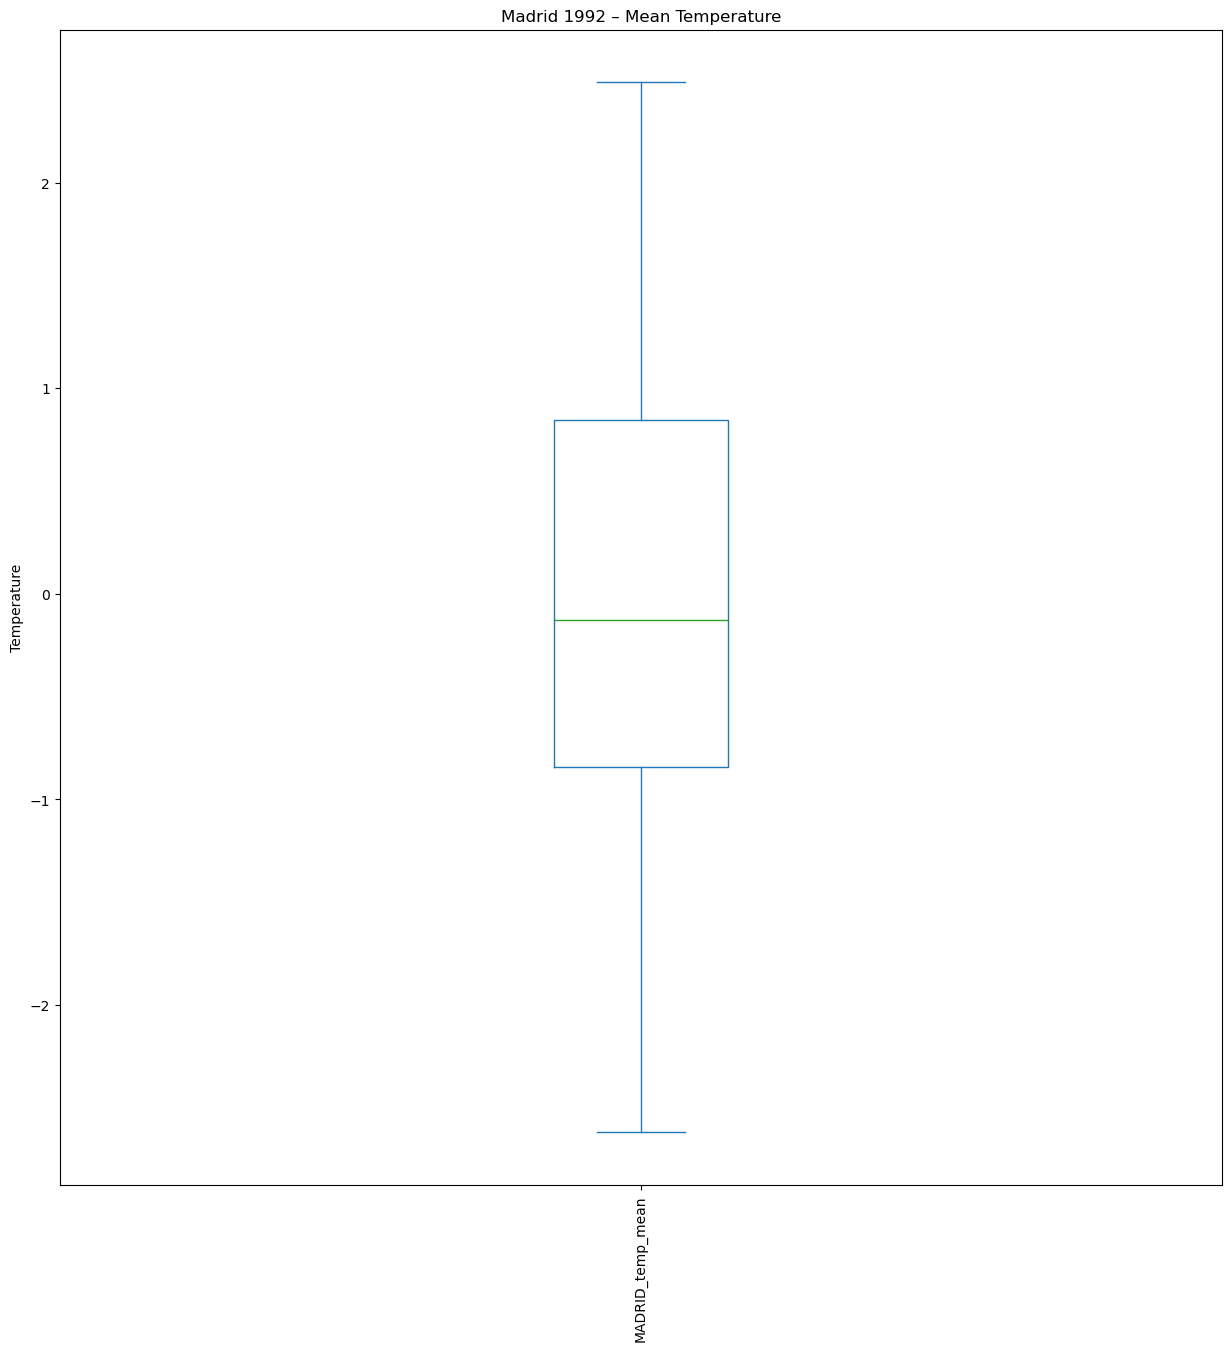

In [198]:
# Create the whisker/box plot
plt.figure(figsize=(15, 15))
df_madrid["MADRID_temp_mean"].plot(kind="box");

plt.xticks(rotation=90)
plt.title("Madrid 1992 – Mean Temperature")
plt.ylabel("Temperature")

# Export the plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/madrid1992_mean_temp_whiskerplot.png"
plt.savefig(save_path, dpi=300)

plt.show()


In [199]:
# Create an index for the year
n_rows = len(dfyear)

i = np.arange(0.01, 0.01*(n_rows+1), 0.01)
index = pd.DataFrame({'index': i})

In [200]:
X = index.to_numpy().reshape(n_rows, 1)
ones = np.ones((n_rows, 1))
X = np.concatenate((ones, X), axis=1)

y = dfyear['MADRID_temp_mean'].to_numpy().reshape(n_rows, 1)

In [201]:
# Check output
X.shape, y.shape

((365, 2), (365, 1))

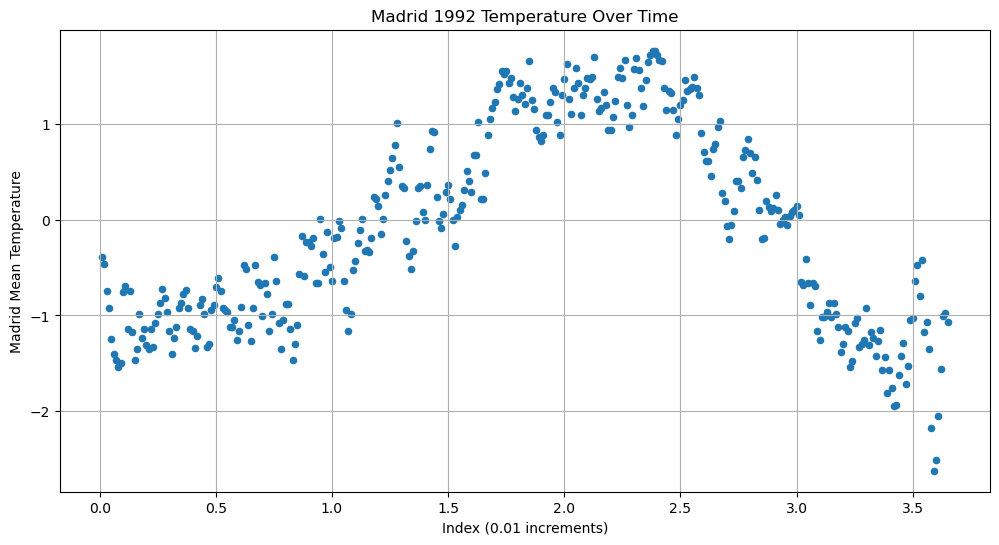

In [202]:
# Scatter plot of the 1992 Madrid temperature

plt.figure(figsize=(12, 6))
plt.scatter(
    x=index['index'], 
    y=dfyear['MADRID_temp_mean'], 
    s=20)

plt.xlabel('Index (0.01 increments)')
plt.ylabel('Madrid Mean Temperature')
plt.title('Madrid 1992 Temperature Over Time')

plt.grid(True)

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/madrid1992_mean_temp_scatterplot.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

In [204]:
# Check for min temperature within the Madrid 1992 Mean Temp
dfyear['MADRID_temp_mean'].min()

-2.619250294671384

In [205]:
# Check for max temperature within the Madrid 1992 Mean Temp
dfyear['MADRID_temp_mean'].max()

1.7614539326451206

In [206]:
# Compute Loss Function for the gradient descent.
def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [207]:
compute_cost(X,y)

array([0.53924436])

In [208]:
# Gradient Descent Function
def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [209]:
# Set the starting condition for theta init
%time
num_iterations=100 
theta_init=np.array([[10],[-10]])
alpha=0.1
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 3 μs, sys: 1e+03 ns, total: 4 μs
Wall time: 20 μs


In [210]:
# Check theta
theta

array([[ 1.13917499],
       [-0.4970395 ]])

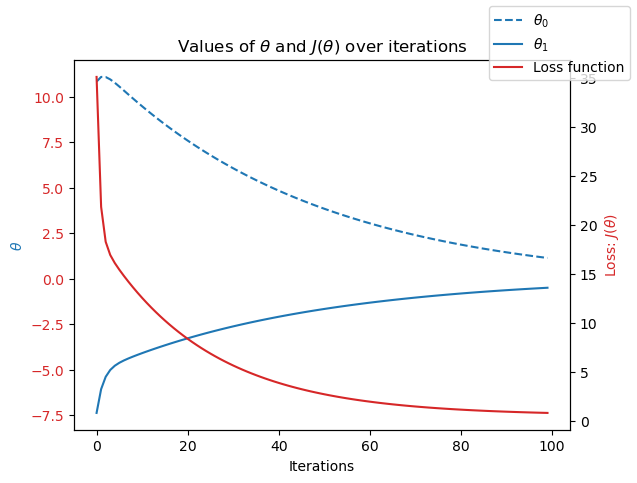

In [211]:
# Plot loss, theta0 and theta1. 
fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend()

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/madrid1992_loss_function.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot with the legend
plt.show()

In [212]:
%%time

# 1. Choose theta ranges based on history (add a margin around loss plot)
theta0_min = min(theta0_history) - 2   # little buffer below
theta0_max = max(theta0_history) + 2   # little buffer above

theta1_min = min(theta1_history) - 2
theta1_max = max(theta1_history) + 2

theta0_vals = np.linspace(theta0_min, theta0_max, 100)
theta1_vals = np.linspace(theta1_min, theta1_max, 100)

# 2. Allocate J(theta0, theta1) grid
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# 3. Compute cost for each (theta0, theta1) pair
for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        theta_ij = np.array([[t0], [t1]])      # column vector shape (2,1)
        J_vals[i, j] = float(compute_cost(X, y, theta_ij))

<timed exec>:18: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



CPU times: user 1.49 s, sys: 39.4 ms, total: 1.53 s
Wall time: 1.76 s


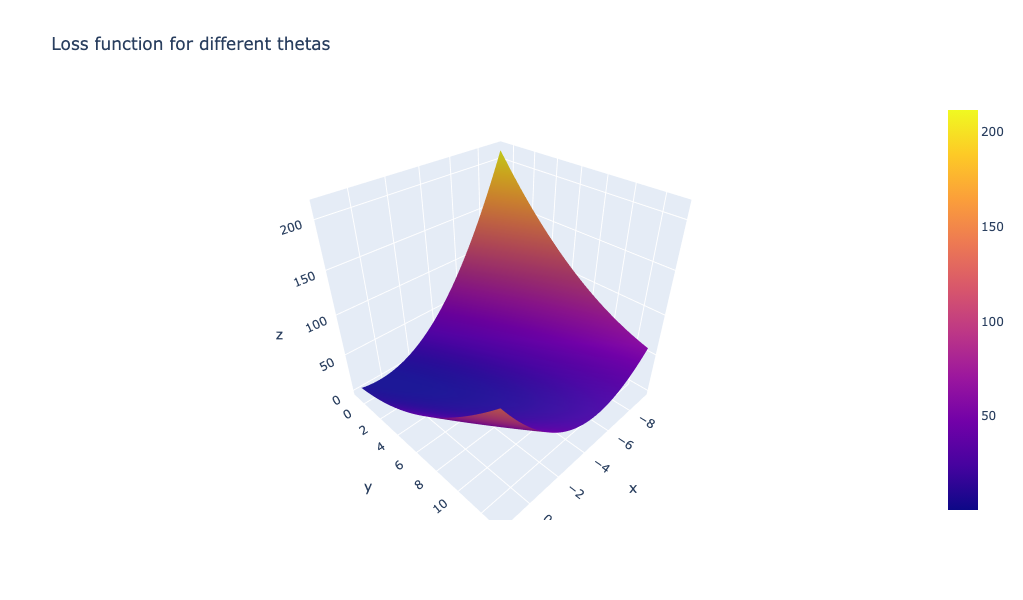

In [213]:
# Plot 3D loss function for different thetas
#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

## 4.3 Madrid, 2019

In [214]:
# Reduce dataset to only 2019
dfyear = df_madrid[df_madrid['DATE'].astype(str).str.contains('2019')]
dfyear

DATE  MONTH  MADRID_temp_mean
21550  20190101 -1.600            -1.123
21551  20190102 -1.600            -1.204
21552  20190103 -1.600            -1.029
21553  20190104 -1.600            -1.217
21554  20190105 -1.600            -1.285
...         ...    ...               ...
21910  20191227  1.594            -0.813
21911  20191228  1.594            -0.907
21912  20191229  1.594            -0.961
21913  20191230  1.594            -1.069
21914  20191231  1.594            -1.096

[365 rows x 3 columns]

In [215]:
# Remove date and month 
notemp = df_madrid.drop(['DATE', 'MONTH'], axis = 1)

In [216]:
dfyear.describe()

DATE    MONTH  MADRID_temp_mean
count  3.650e+02  365.000           365.000
mean   2.019e+07    0.005             0.163
std    3.455e+02    1.003             1.026
min    2.019e+07   -1.600            -1.743
25%    2.019e+07   -0.729            -0.719
50%    2.019e+07    0.142            -0.045
75%    2.019e+07    1.014             0.912
max    2.019e+07    1.594             2.355

In [217]:
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [218]:
notempyear

MADRID_temp_mean
21550            -1.123
21551            -1.204
21552            -1.029
21553            -1.217
21554            -1.285
...                 ...
21910            -0.813
21911            -0.907
21912            -0.961
21913            -1.069
21914            -1.096

[365 rows x 1 columns]

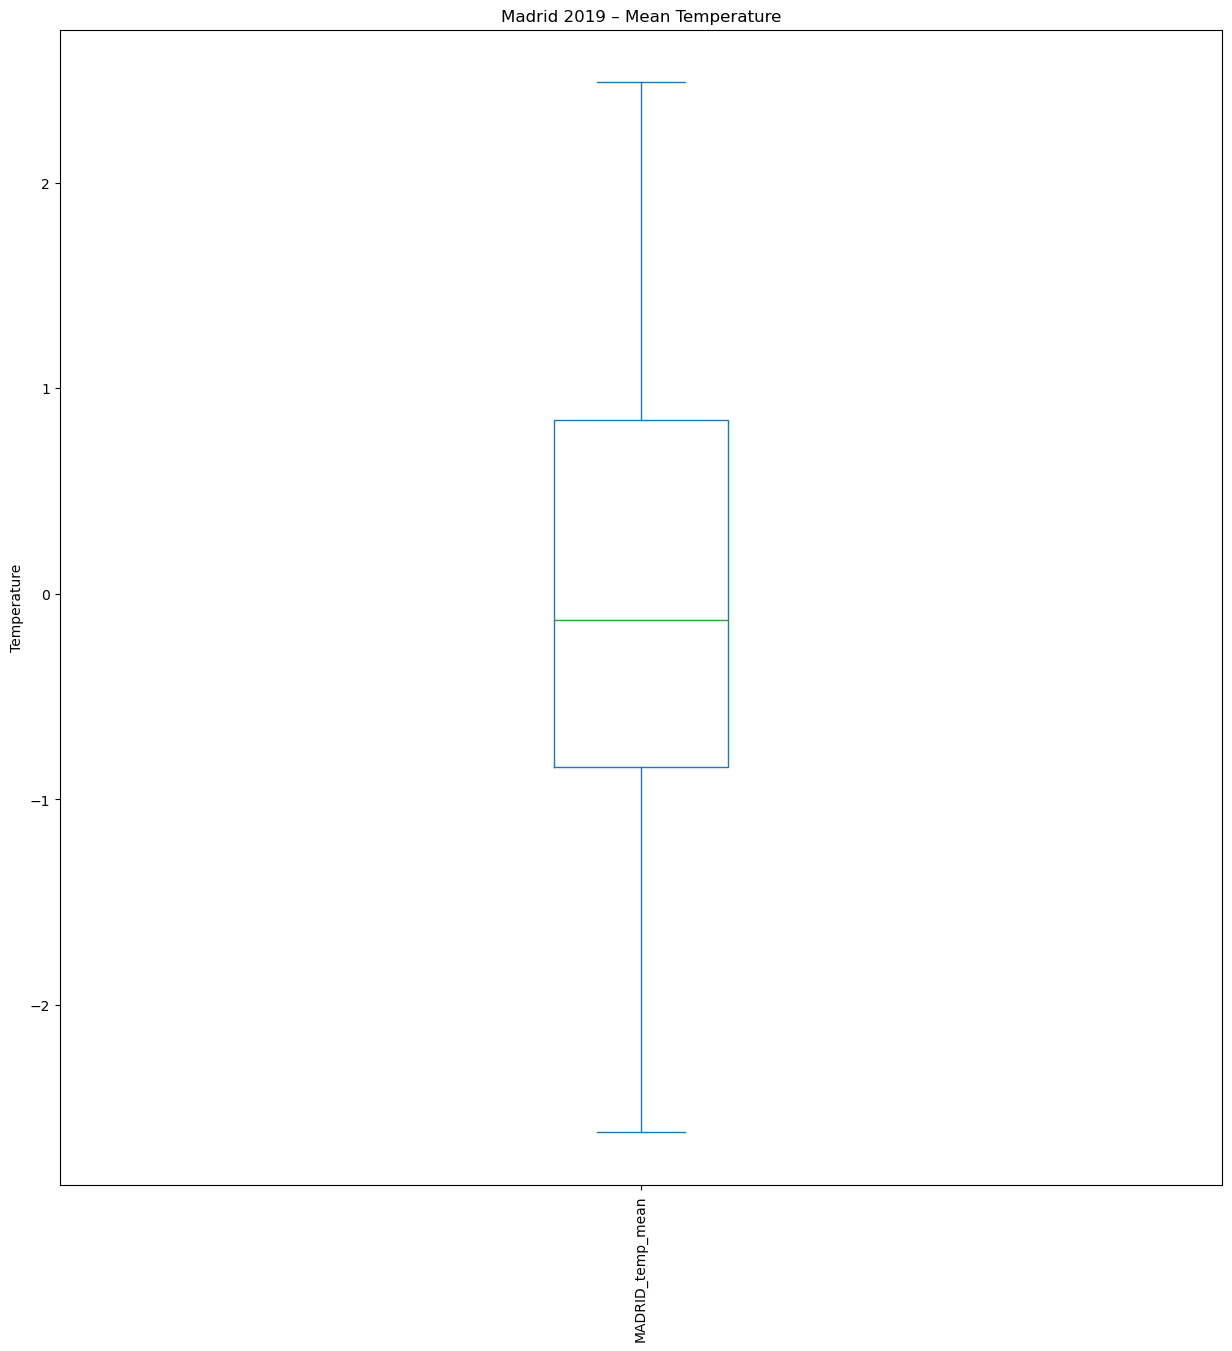

In [219]:
# Create the whisker/box plot
plt.figure(figsize=(15, 15))
df_madrid["MADRID_temp_mean"].plot(kind="box");

plt.xticks(rotation=90)
plt.title("Madrid 2019 – Mean Temperature")
plt.ylabel("Temperature")

# Export the plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/madrid2019_mean_temp_whiskerplot.png"
plt.savefig(save_path, dpi=300)

plt.show()

In [220]:
# Create an index for the year
n_rows = len(dfyear)

i = np.arange(0.01, 0.01*(n_rows+1), 0.01)
index = pd.DataFrame({'index': i})

In [221]:
X = index.to_numpy().reshape(n_rows, 1)
ones = np.ones((n_rows, 1))
X = np.concatenate((ones, X), axis=1)

y = dfyear['MADRID_temp_mean'].to_numpy().reshape(n_rows, 1)

In [222]:
# Check output
X.shape, y.shape

((365, 2), (365, 1))

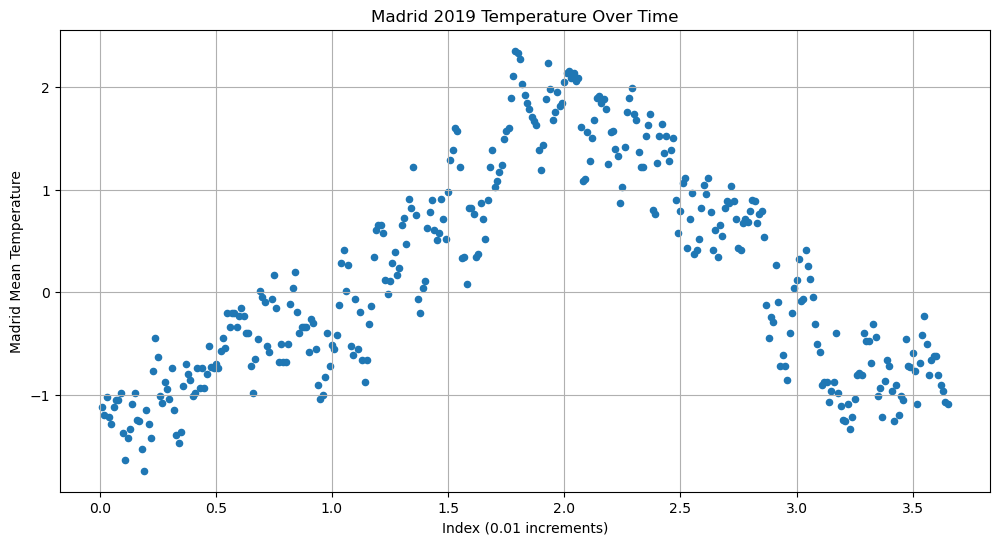

In [224]:
# Scatter plot of the 2019 Madrid temperature

plt.figure(figsize=(12, 6))
plt.scatter(
    x=index['index'], 
    y=dfyear['MADRID_temp_mean'], 
    s=20)

plt.xlabel('Index (0.01 increments)')
plt.ylabel('Madrid Mean Temperature')
plt.title('Madrid 2019 Temperature Over Time')

plt.grid(True)

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/madrid2019_mean_temp_scatterplot.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

In [225]:
# Check for min temperature within the Madrid 2019 Mean Temp
dfyear['MADRID_temp_mean'].min()

-1.743109449208083

In [226]:
# Check for max temperature within the Madrid 2019 Mean Temp
dfyear['MADRID_temp_mean'].max()

2.354533889574124

In [227]:
# Compute Loss Function for the gradient descent.
def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [228]:
compute_cost(X,y)

array([0.53793932])

In [229]:
# Gradient Descent Function
def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [230]:
# Set the starting condition for theta init
%time
num_iterations=100 
theta_init=np.array([[10],[-10]])
alpha=0.1
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 8 μs, sys: 2 μs, total: 10 μs
Wall time: 220 μs


In [231]:
# Check theta
theta

array([[ 1.2701707],
       [-0.4374733]])

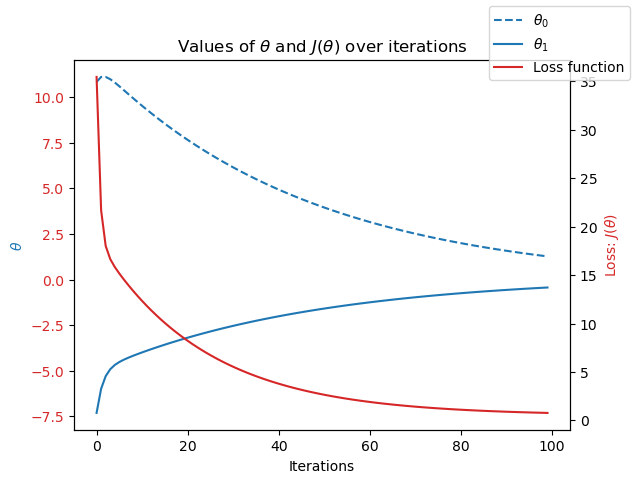

In [232]:
# Plot loss, theta0 and theta1. 
fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend()

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/madrid2019_loss_function.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot with the legend
plt.show()

In [233]:
%%time

# 1. Choose theta ranges based on history (add a margin around loss plot)
theta0_min = min(theta0_history) - 2   # little buffer below
theta0_max = max(theta0_history) + 2   # little buffer above

theta1_min = min(theta1_history) - 2
theta1_max = max(theta1_history) + 2

theta0_vals = np.linspace(theta0_min, theta0_max, 100)
theta1_vals = np.linspace(theta1_min, theta1_max, 100)

# 2. Allocate J(theta0, theta1) grid
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# 3. Compute cost for each (theta0, theta1) pair
for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        theta_ij = np.array([[t0], [t1]])      # column vector shape (2,1)
        J_vals[i, j] = float(compute_cost(X, y, theta_ij))

<timed exec>:18: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



CPU times: user 1.35 s, sys: 35.8 ms, total: 1.39 s
Wall time: 1.64 s


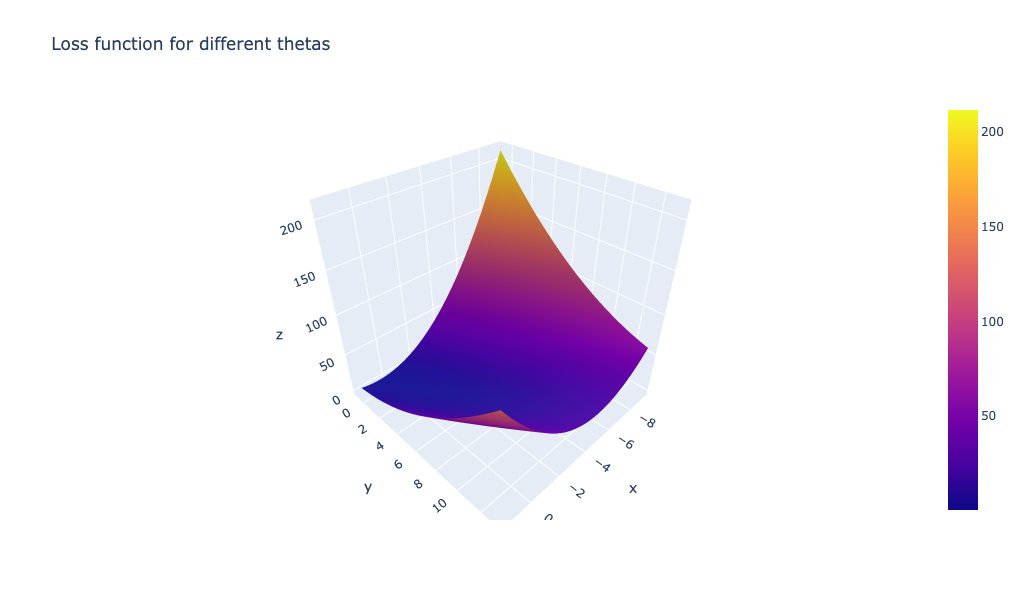

In [234]:
# Plot 3D loss function for different thetas
#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

# 5. Stockholm

In [235]:
# Create new df for Stockholm
# Reduce the data to only temperature in Stockholm
df_sth = df[['DATE', 'MONTH', 'STOCKHOLM_temp_mean']].copy()
df_sth

DATE  MONTH  STOCKHOLM_temp_mean
0      19600101 -1.600               -0.391
1      19600102 -1.600               -0.416
2      19600103 -1.600               -0.615
3      19600104 -1.600               -0.764
4      19600105 -1.600               -0.503
...         ...    ...                  ...
22945  20221027  1.014                0.517
22946  20221028  1.014                0.641
22947  20221029  1.014                0.716
22948  20221030  1.014                0.019
22949  20221031  1.014                0.293

[22950 rows x 3 columns]

## 5.1 Stockholm, 1962

In [236]:
# Reduce dataset to only 1962
dfyear = df_sth[df_sth['DATE'].astype(str).str.contains('1962')]
dfyear

DATE  MONTH  STOCKHOLM_temp_mean
731   19620101 -1.600               -0.889
732   19620102 -1.600               -1.548
733   19620103 -1.600               -1.162
734   19620104 -1.600               -1.113
735   19620105 -1.600               -0.652
...        ...    ...                  ...
1091  19621227  1.594               -1.959
1092  19621228  1.594               -1.896
1093  19621229  1.594               -1.324
1094  19621230  1.594               -2.033
1095  19621231  1.594               -2.145

[365 rows x 3 columns]

In [237]:
# Remove date and month 
notemp = df_madrid.drop(['DATE', 'MONTH'], axis = 1)

In [238]:
dfyear.describe()

DATE    MONTH  STOCKHOLM_temp_mean
count  3.650e+02  365.000              365.000
mean   1.962e+07    0.005               -0.200
std    3.455e+02    1.003                0.901
min    1.962e+07   -1.600               -2.207
25%    1.962e+07   -0.729               -0.914
50%    1.962e+07    0.142               -0.092
75%    1.962e+07    1.014                0.579
max    1.962e+07    1.594                1.413

In [239]:
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [240]:
notempyear

STOCKHOLM_temp_mean
731                -0.889
732                -1.548
733                -1.162
734                -1.113
735                -0.652
...                   ...
1091               -1.959
1092               -1.896
1093               -1.324
1094               -2.033
1095               -2.145

[365 rows x 1 columns]

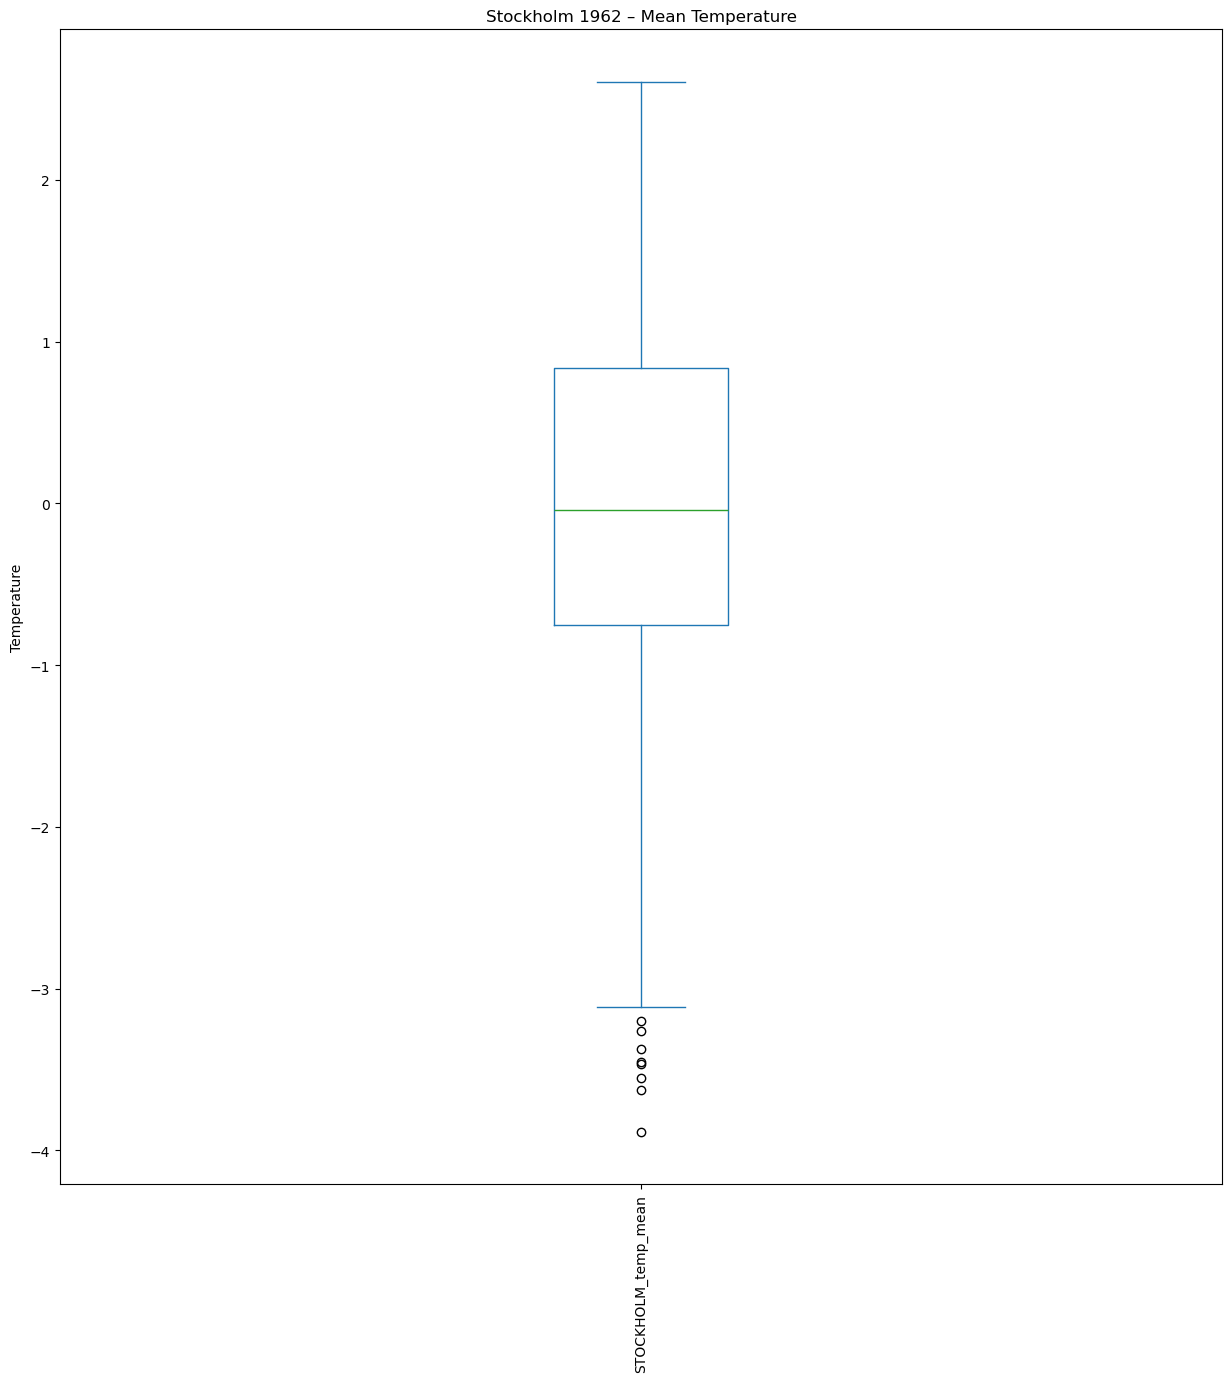

In [241]:
# Create the whisker/box plot
plt.figure(figsize=(15, 15))
df_sth["STOCKHOLM_temp_mean"].plot(kind="box");

plt.xticks(rotation=90)
plt.title("Stockholm 1962 – Mean Temperature")
plt.ylabel("Temperature")

# Export the plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/stockholm1962_mean_temp_whiskerplot.png"
plt.savefig(save_path, dpi=300)

plt.show()

In [242]:
# Create an index for the year
n_rows = len(dfyear)

i = np.arange(0.01, 0.01*(n_rows+1), 0.01)
index = pd.DataFrame({'index': i})

In [244]:
X = index.to_numpy().reshape(n_rows, 1)
ones = np.ones((n_rows, 1))
X = np.concatenate((ones, X), axis=1)

y = dfyear['STOCKHOLM_temp_mean'].to_numpy().reshape(n_rows, 1)

In [245]:
# Check output
X.shape, y.shape

((365, 2), (365, 1))

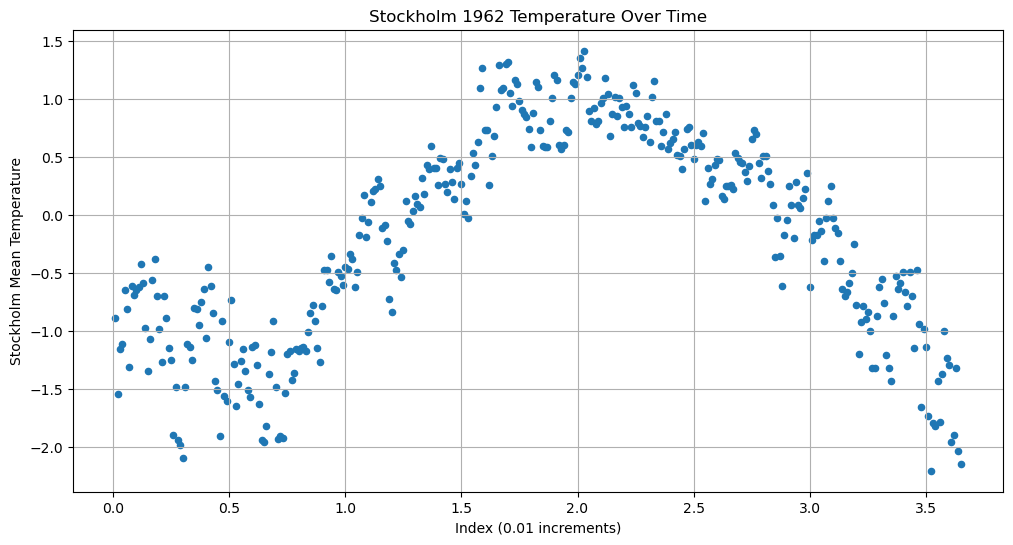

In [246]:
# Scatter plot of the 1962 Stockholm temperature

plt.figure(figsize=(12, 6))
plt.scatter(
    x=index['index'], 
    y=dfyear['STOCKHOLM_temp_mean'], 
    s=20)

plt.xlabel('Index (0.01 increments)')
plt.ylabel('Stockholm Mean Temperature')
plt.title('Stockholm 1962 Temperature Over Time')

plt.grid(True)

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/stockholm1962_mean_temp_scatterplot.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

In [247]:
# Check for min temperature within the Stockholm 1962 Mean Temp
dfyear['STOCKHOLM_temp_mean'].min()

-2.2073966406712735

In [248]:
# Check for max temperature within the Stockholm 1962 Mean Temp
dfyear['STOCKHOLM_temp_mean'].max()

1.4128117350986702

In [249]:
# Compute Loss Function for the gradient descent.
def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [250]:
compute_cost(X,y)

array([0.42471267])

In [251]:
# Gradient Descent Function
def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [252]:
# Set the starting condition for theta init
%time
num_iterations=100 
theta_init=np.array([[10],[-10]])
alpha=0.1
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 4 μs, sys: 1e+03 ns, total: 5 μs
Wall time: 192 μs


In [253]:
# Check theta
theta

array([[ 0.9173245 ],
       [-0.43875083]])

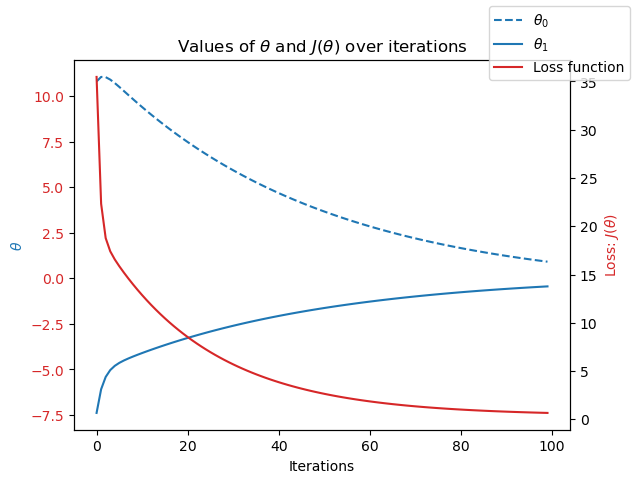

In [254]:
# Plot loss, theta0 and theta1. 
fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend()

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/stockholm1962_loss_function.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot with the legend
plt.show()

In [255]:
%%time

# 1. Choose theta ranges based on history (add a margin around loss plot)
theta0_min = min(theta0_history) - 2   # little buffer below
theta0_max = max(theta0_history) + 2   # little buffer above

theta1_min = min(theta1_history) - 2
theta1_max = max(theta1_history) + 2

theta0_vals = np.linspace(theta0_min, theta0_max, 100)
theta1_vals = np.linspace(theta1_min, theta1_max, 100)

# 2. Allocate J(theta0, theta1) grid
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# 3. Compute cost for each (theta0, theta1) pair
for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        theta_ij = np.array([[t0], [t1]])      # column vector shape (2,1)
        J_vals[i, j] = float(compute_cost(X, y, theta_ij))

<timed exec>:18: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



CPU times: user 1.34 s, sys: 41.7 ms, total: 1.38 s
Wall time: 1.58 s


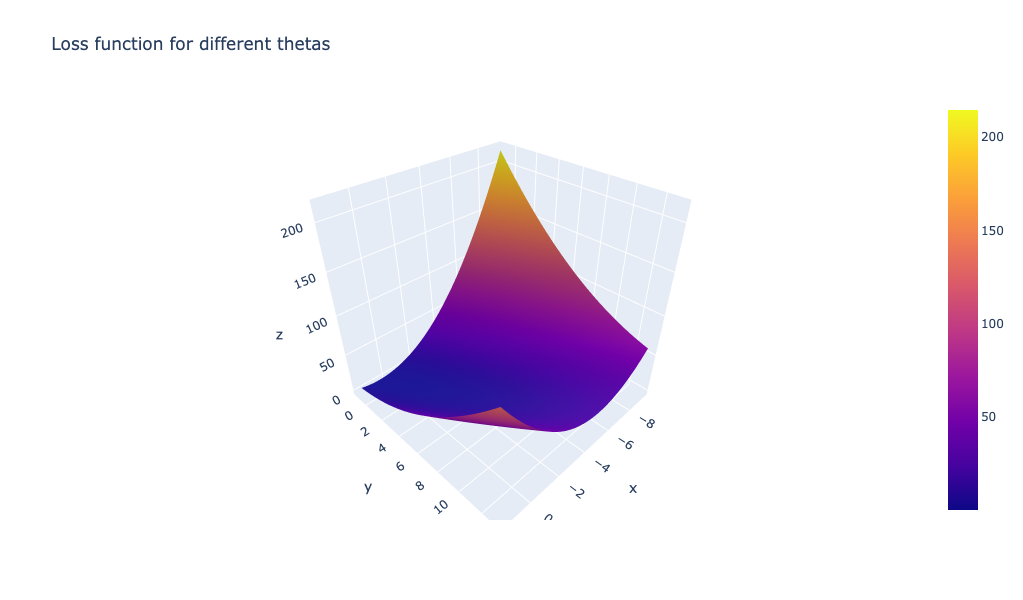

In [256]:
# Plot 3D loss function for different thetas
#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

## 5.2 Stockholm, 1992

In [257]:
# Reduce dataset to only 1992
dfyear = df_sth[df_sth['DATE'].astype(str).str.contains('1992')]
dfyear

DATE  MONTH  STOCKHOLM_temp_mean
11688  19920101 -1.600               -0.491
11689  19920102 -1.600               -0.416
11690  19920103 -1.600                0.119
11691  19920104 -1.600               -0.416
11692  19920105 -1.600               -0.926
...         ...    ...                  ...
12049  19921227  1.594               -1.038
12050  19921228  1.594               -0.976
12051  19921229  1.594               -0.627
12052  19921230  1.594               -1.026
12053  19921231  1.594               -0.764

[366 rows x 3 columns]

In [258]:
# Remove date and month 
notemp = df_madrid.drop(['DATE', 'MONTH'], axis = 1)

In [259]:
dfyear.describe()

DATE    MONTH  STOCKHOLM_temp_mean
count  3.660e+02  366.000              366.000
mean   1.992e+07    0.001                0.079
std    3.458e+02    1.004                0.917
min    1.992e+07   -1.600               -1.598
25%    1.992e+07   -0.729               -0.674
50%    1.992e+07    0.142               -0.204
75%    1.992e+07    0.941                0.953
max    1.992e+07    1.594                1.948

In [260]:
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [261]:
notempyear

STOCKHOLM_temp_mean
11688               -0.491
11689               -0.416
11690                0.119
11691               -0.416
11692               -0.926
...                    ...
12049               -1.038
12050               -0.976
12051               -0.627
12052               -1.026
12053               -0.764

[366 rows x 1 columns]

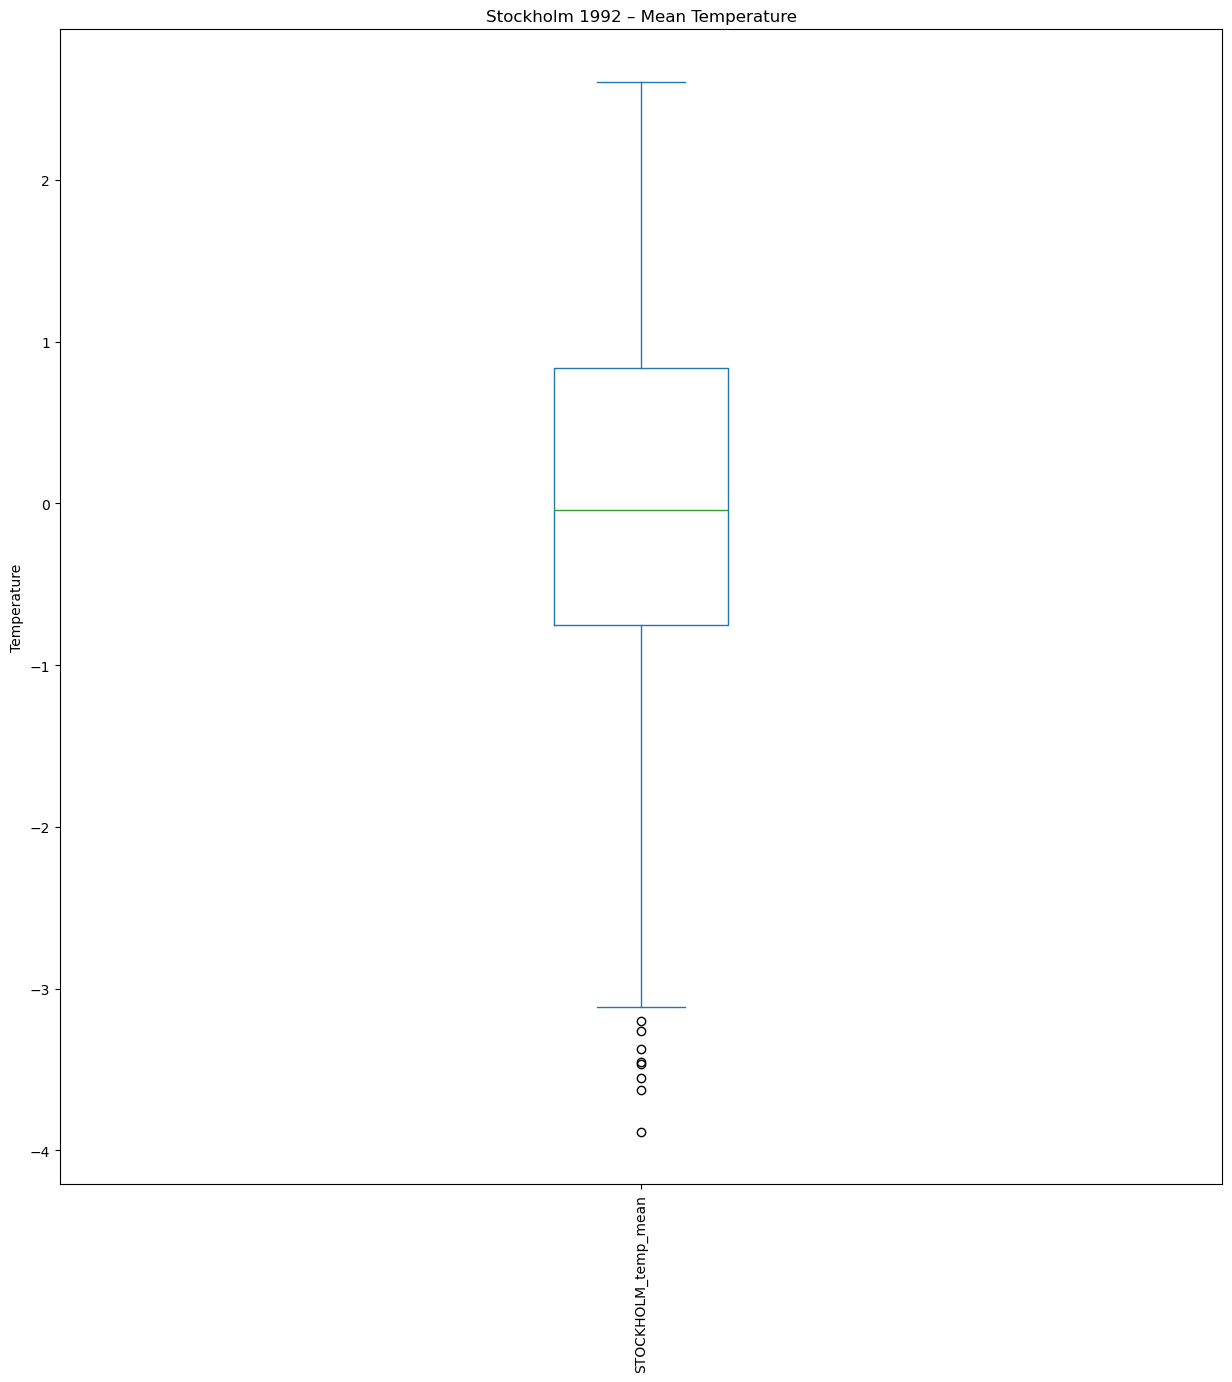

In [262]:
# Create the whisker/box plot
plt.figure(figsize=(15, 15))
df_sth["STOCKHOLM_temp_mean"].plot(kind="box");

plt.xticks(rotation=90)
plt.title("Stockholm 1992 – Mean Temperature")
plt.ylabel("Temperature")

# Export the plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/stockholm1992_mean_temp_whiskerplot.png"
plt.savefig(save_path, dpi=300)

plt.show()

In [263]:
# Create an index for the year
n_rows = len(dfyear)

i = np.arange(0.01, 0.01*(n_rows+1), 0.01)
index = pd.DataFrame({'index': i})

In [264]:
X = index.to_numpy().reshape(n_rows, 1)
ones = np.ones((n_rows, 1))
X = np.concatenate((ones, X), axis=1)

y = dfyear['STOCKHOLM_temp_mean'].to_numpy().reshape(n_rows, 1)

In [265]:
# Check output
X.shape, y.shape

((366, 2), (366, 1))

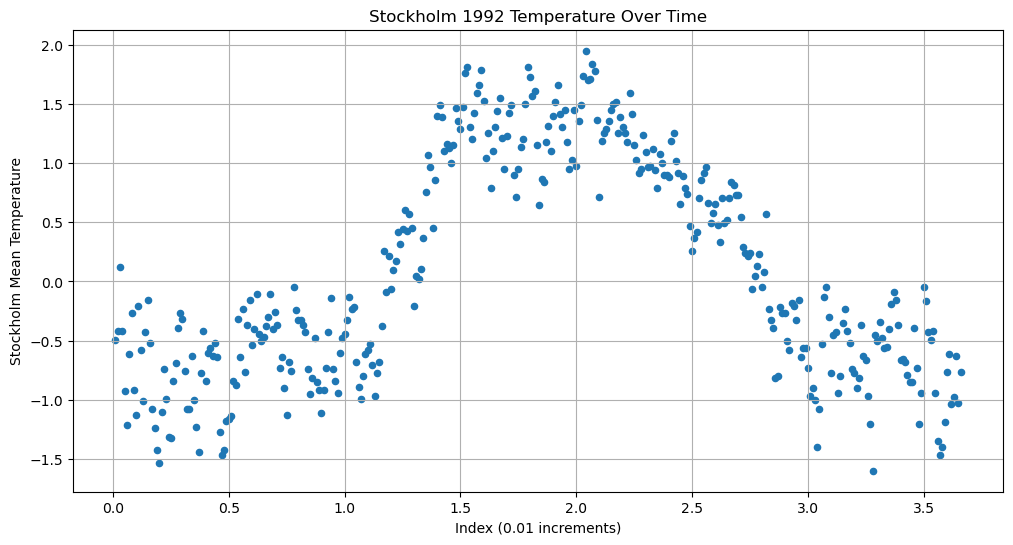

In [266]:
# Scatter plot of the 1992 Stockholm temperature

plt.figure(figsize=(12, 6))
plt.scatter(
    x=index['index'], 
    y=dfyear['STOCKHOLM_temp_mean'], 
    s=20)

plt.xlabel('Index (0.01 increments)')
plt.ylabel('Stockholm Mean Temperature')
plt.title('Stockholm 1992 Temperature Over Time')

plt.grid(True)

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/stockholm1992_mean_temp_scatterplot.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()


In [267]:
# Check for min temperature within the Stockholm 1992 Mean Temp
dfyear['STOCKHOLM_temp_mean'].min()

-1.597808288737503

In [268]:
# Check for max temperature within the Stockholm 1992 Mean Temp
dfyear['STOCKHOLM_temp_mean'].max()

1.9477566153670811

In [269]:
# Compute Loss Function for the gradient descent.
def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [270]:
compute_cost(X,y)

array([0.42259838])

In [271]:
# Gradient Descent Function
def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [272]:
# Set the starting condition for theta init
%time
num_iterations=100 
theta_init=np.array([[10],[-10]])
alpha=0.1
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 9.06 μs


In [273]:
# Check theta
theta

array([[ 1.32015037],
       [-0.51050146]])

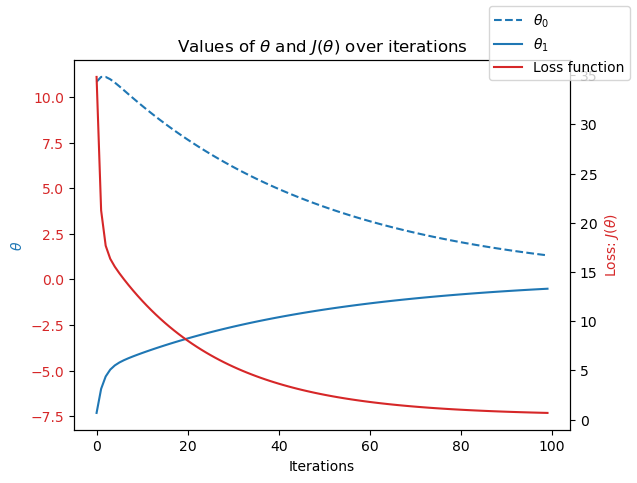

In [274]:
# Plot loss, theta0 and theta1. 
fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend()

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/stockholm1992_loss_function.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot with the legend
plt.show()

In [275]:
%%time

# 1. Choose theta ranges based on history (add a margin around loss plot)
theta0_min = min(theta0_history) - 2   # little buffer below
theta0_max = max(theta0_history) + 2   # little buffer above

theta1_min = min(theta1_history) - 2
theta1_max = max(theta1_history) + 2

theta0_vals = np.linspace(theta0_min, theta0_max, 100)
theta1_vals = np.linspace(theta1_min, theta1_max, 100)

# 2. Allocate J(theta0, theta1) grid
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# 3. Compute cost for each (theta0, theta1) pair
for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        theta_ij = np.array([[t0], [t1]])      # column vector shape (2,1)
        J_vals[i, j] = float(compute_cost(X, y, theta_ij))

<timed exec>:18: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



CPU times: user 1.5 s, sys: 65.2 ms, total: 1.57 s
Wall time: 2.12 s


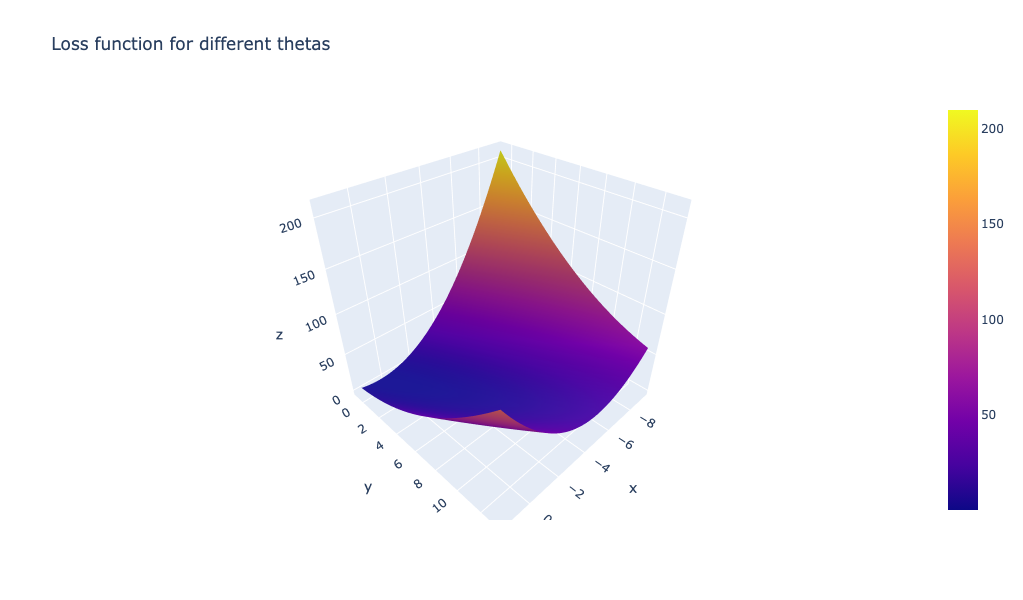

In [276]:
# Plot 3D loss function for different thetas
#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

## 5.3 Stockholm, 2019

In [277]:
# Reduce dataset to only 2019
dfyear = df_sth[df_sth['DATE'].astype(str).str.contains('2019')]
dfyear

DATE  MONTH  STOCKHOLM_temp_mean
21550  20190101 -1.600               -0.391
21551  20190102 -1.600               -1.038
21552  20190103 -1.600               -1.212
21553  20190104 -1.600               -0.578
21554  20190105 -1.600               -0.839
...         ...    ...                  ...
21910  20191227  1.594               -1.013
21911  20191228  1.594               -1.175
21912  20191229  1.594               -0.565
21913  20191230  1.594                0.094
21914  20191231  1.594               -0.366

[365 rows x 3 columns]

In [278]:
# Remove date and month 
notemp = df_madrid.drop(['DATE', 'MONTH'], axis = 1)

In [279]:
dfyear.describe()

DATE    MONTH  STOCKHOLM_temp_mean
count  3.650e+02  365.000              365.000
mean   2.019e+07    0.005                0.157
std    3.455e+02    1.003                0.920
min    2.019e+07   -1.600               -1.747
25%    2.019e+07   -0.729               -0.540
50%    2.019e+07    0.142                0.032
75%    2.019e+07    1.014                0.928
max    2.019e+07    1.594                2.271

In [280]:
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [281]:
notempyear

STOCKHOLM_temp_mean
21550               -0.391
21551               -1.038
21552               -1.212
21553               -0.578
21554               -0.839
...                    ...
21910               -1.013
21911               -1.175
21912               -0.565
21913                0.094
21914               -0.366

[365 rows x 1 columns]

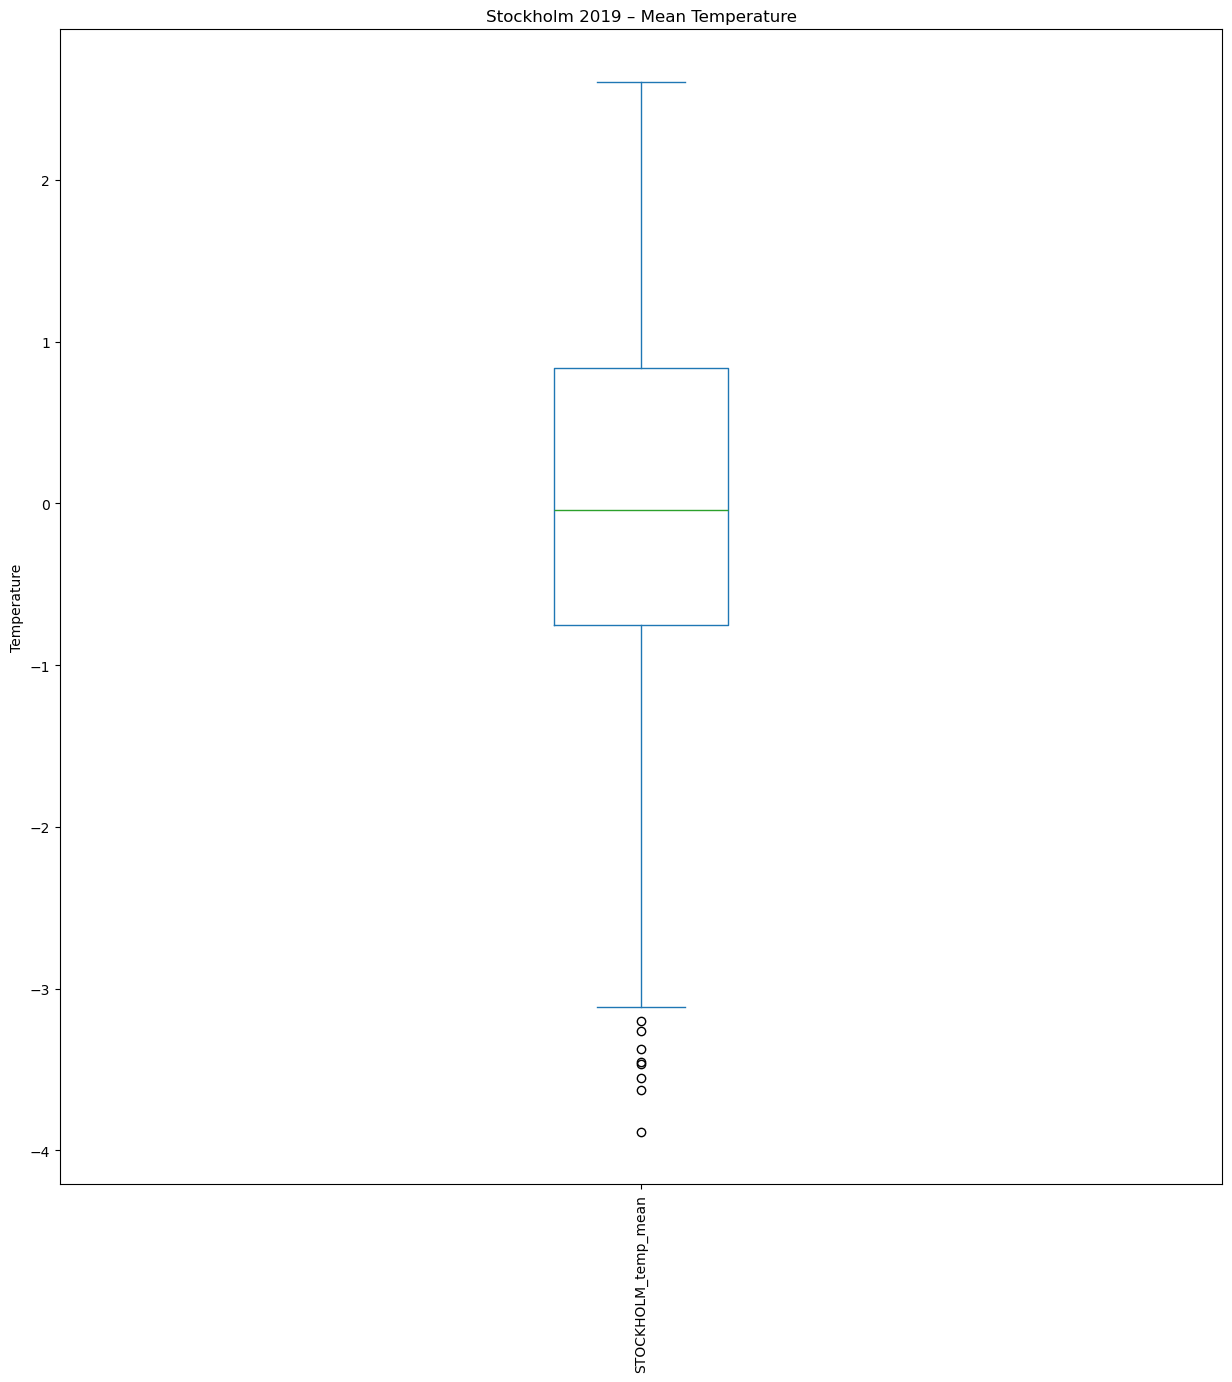

In [282]:
# Create the whisker/box plot
plt.figure(figsize=(15, 15))
df_sth["STOCKHOLM_temp_mean"].plot(kind="box");

plt.xticks(rotation=90)
plt.title("Stockholm 2019 – Mean Temperature")
plt.ylabel("Temperature")

# Export the plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/stockholm2019_mean_temp_whiskerplot.png"
plt.savefig(save_path, dpi=300)

plt.show()

In [283]:
# Create an index for the year
n_rows = len(dfyear)

i = np.arange(0.01, 0.01*(n_rows+1), 0.01)
index = pd.DataFrame({'index': i})

In [284]:
X = index.to_numpy().reshape(n_rows, 1)
ones = np.ones((n_rows, 1))
X = np.concatenate((ones, X), axis=1)

y = dfyear['STOCKHOLM_temp_mean'].to_numpy().reshape(n_rows, 1)

In [285]:
# Check output
X.shape, y.shape

((365, 2), (365, 1))

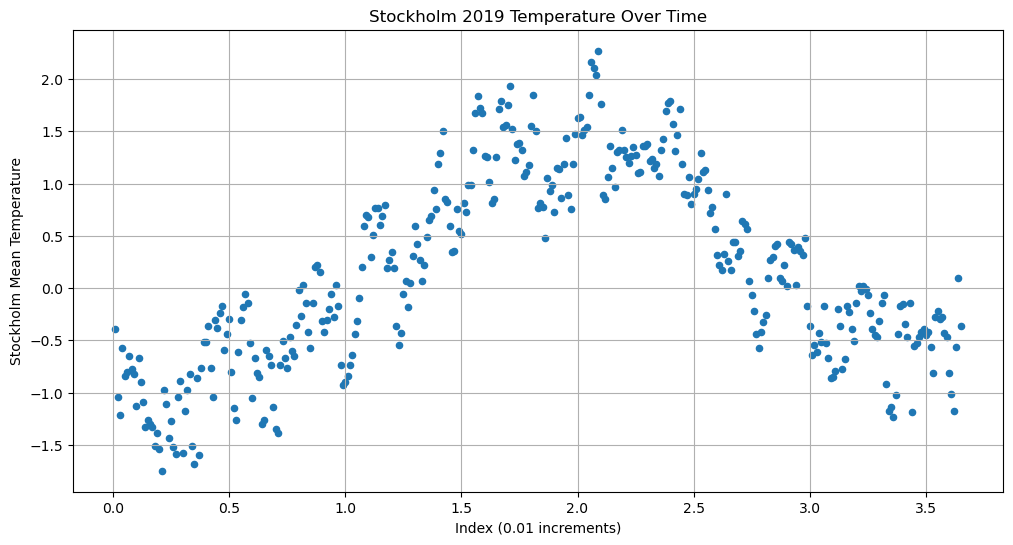

In [286]:
# Scatter plot of the 2019 Stockholm temperature

plt.figure(figsize=(12, 6))
plt.scatter(
    x=index['index'], 
    y=dfyear['STOCKHOLM_temp_mean'], 
    s=20)

plt.xlabel('Index (0.01 increments)')
plt.ylabel('Stockholm Mean Temperature')
plt.title('Stockholm 2019 Temperature Over Time')

plt.grid(True)

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/stockholm2019_mean_temp_scatterplot.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

In [287]:
# Check for min temperature within the Stockholm 2019 Mean Temp
dfyear['STOCKHOLM_temp_mean'].min()

-1.7470952320682225

In [288]:
# Check for max temperature within the Stockholm 2019 Mean Temp
dfyear['STOCKHOLM_temp_mean'].max()

2.271211659250307

In [289]:
# Compute Loss Function for the gradient descent.
def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [290]:
compute_cost(X,y)

array([0.43474191])

In [291]:
# Gradient Descent Function
def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [292]:
# Set the starting condition for theta init
%time
num_iterations=100 
theta_init=np.array([[10],[-10]])
alpha=0.1
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 14.1 μs


In [293]:
# Check theta
theta

array([[ 1.20990709],
       [-0.4071878 ]])

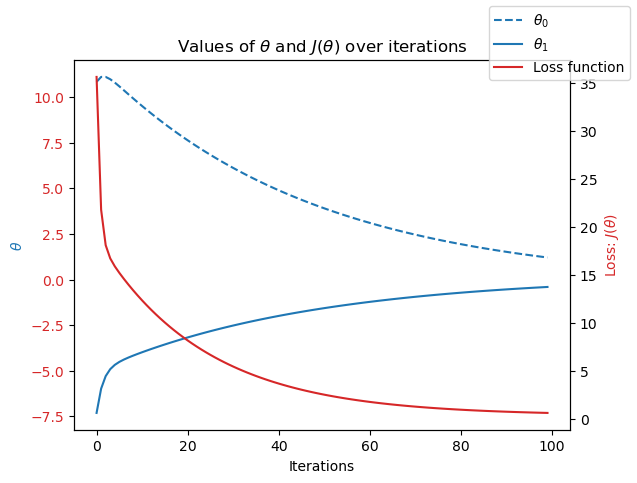

In [294]:
# Plot loss, theta0 and theta1. 
fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend()

# Export plot
save_path = "/Users/charlottelin/Documents/11-2025 ClimateWins Machine Learning Analysis/04 Analysis/Visualizations/stockholm2019_loss_function.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot with the legend
plt.show()

In [295]:
%%time

# 1. Choose theta ranges based on history (add a margin around loss plot)
theta0_min = min(theta0_history) - 2   # little buffer below
theta0_max = max(theta0_history) + 2   # little buffer above

theta1_min = min(theta1_history) - 2
theta1_max = max(theta1_history) + 2

theta0_vals = np.linspace(theta0_min, theta0_max, 100)
theta1_vals = np.linspace(theta1_min, theta1_max, 100)

# 2. Allocate J(theta0, theta1) grid
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# 3. Compute cost for each (theta0, theta1) pair
for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        theta_ij = np.array([[t0], [t1]])      # column vector shape (2,1)
        J_vals[i, j] = float(compute_cost(X, y, theta_ij))

<timed exec>:18: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



CPU times: user 1.59 s, sys: 57.3 ms, total: 1.65 s
Wall time: 1.98 s


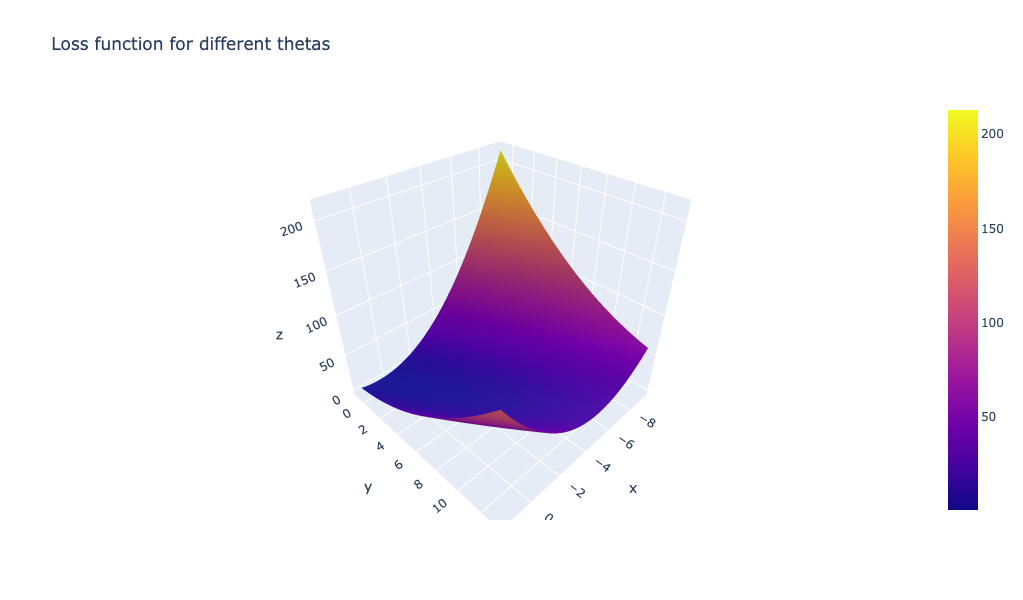

In [296]:
# Plot 3D loss function for different thetas
#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()